   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA6-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

## The purpose of the assignment:
The purpose of this project is to explore dimensionality reduction and unsupervised learning techniques on a dataset of diabetic patient records. The dataset contains 200,000 items with 50 features, collected from various hospitals and clinics in America. By preprocessing the dataset, applying dimensionality reduction methods, and utilizing unsupervised learning algorithms, we aim to simplify the complexity of the data and uncover patterns or insights that could aid in understanding hospital readmission rates for diabetic patients. The ultimate goal is to evaluate and analyze the results to gain valuable insights that can inform decision-making in healthcare settings.


<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1>  Part1 : Preprocessing </h1>
    </div>
</html>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.impute import KNNImputer

In [2]:
#pd.set_option('display.max_rows', None)
df = pd.read_csv("diabetic_data.csv")
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df["examide"].unique()

array(['No'], dtype=object)

In [6]:
df["citoglipton"].unique()

array(['No'], dtype=object)

# handle duplication

In [7]:
 df.duplicated().sum()

0

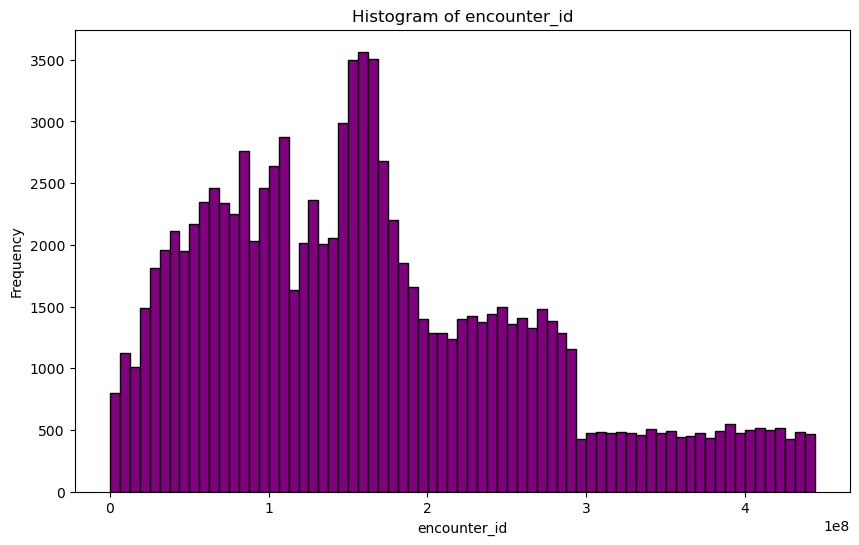

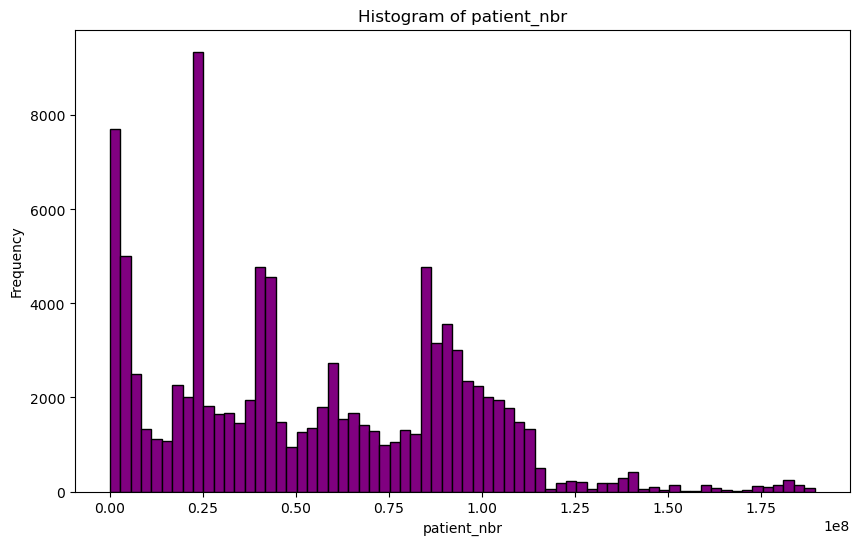

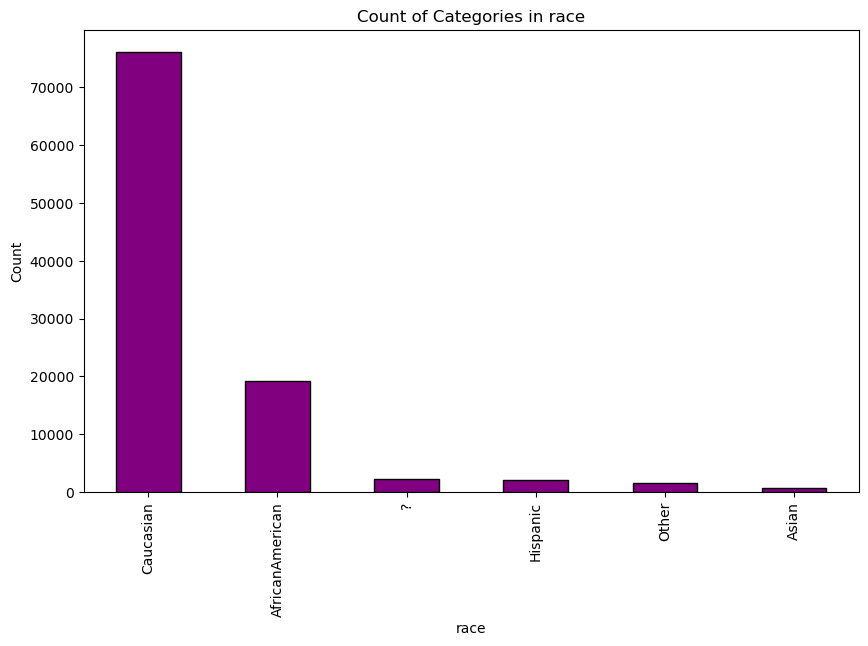

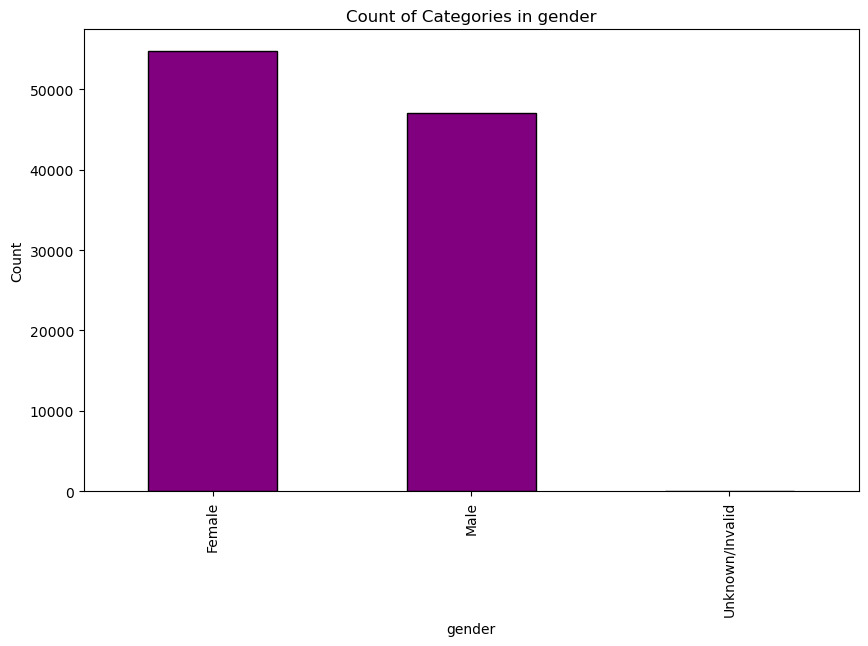

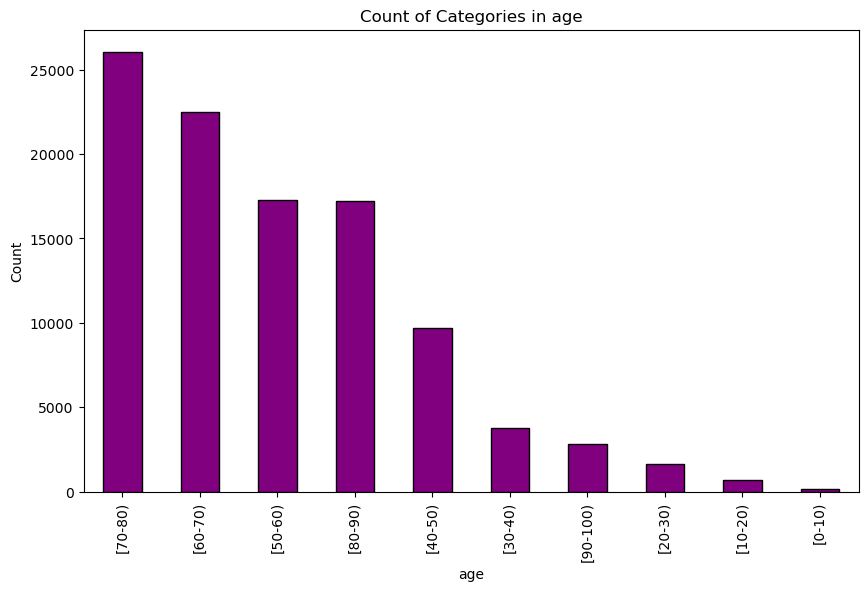

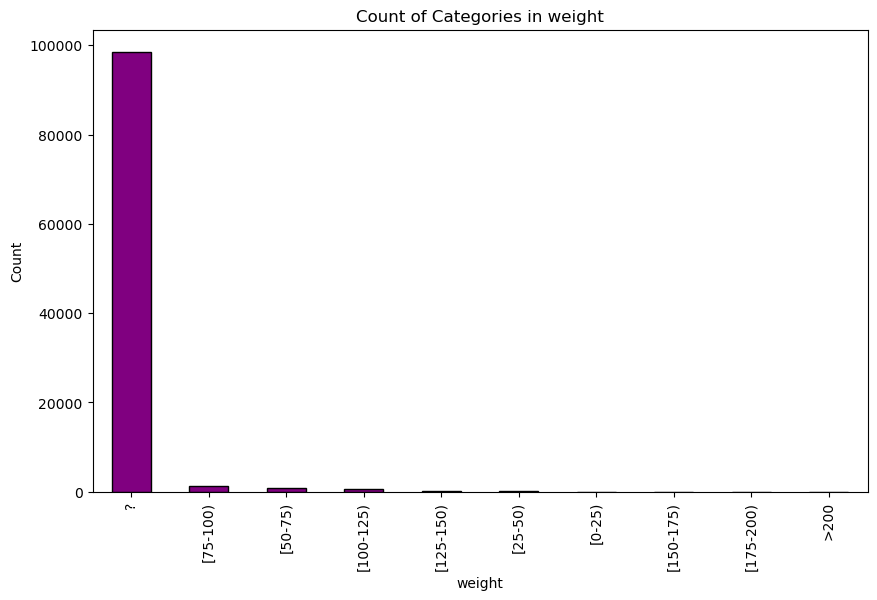

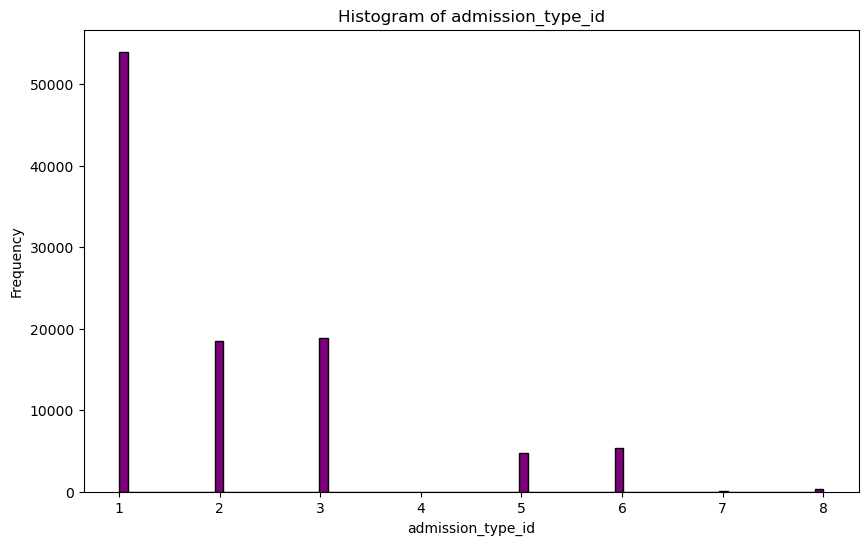

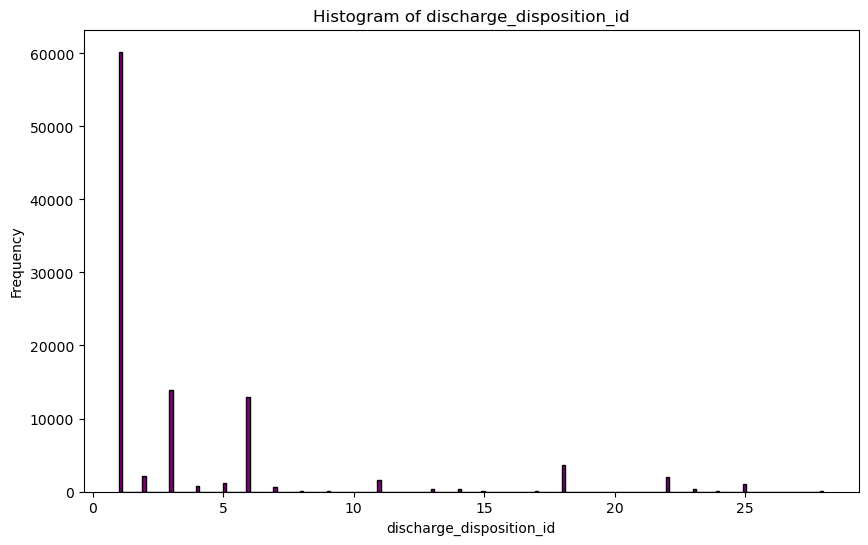

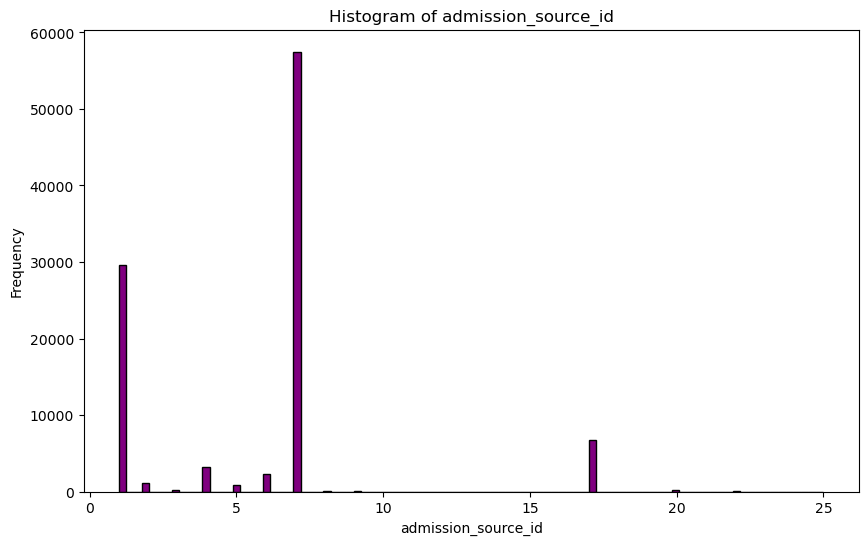

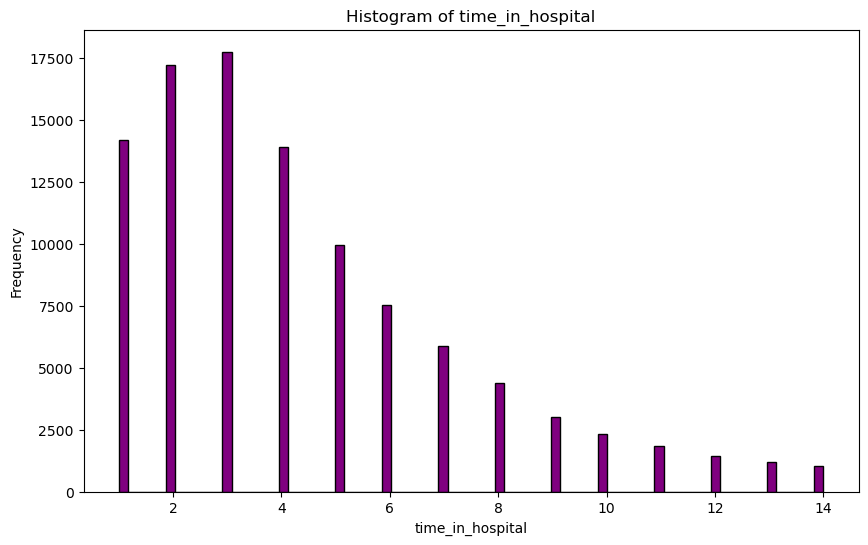

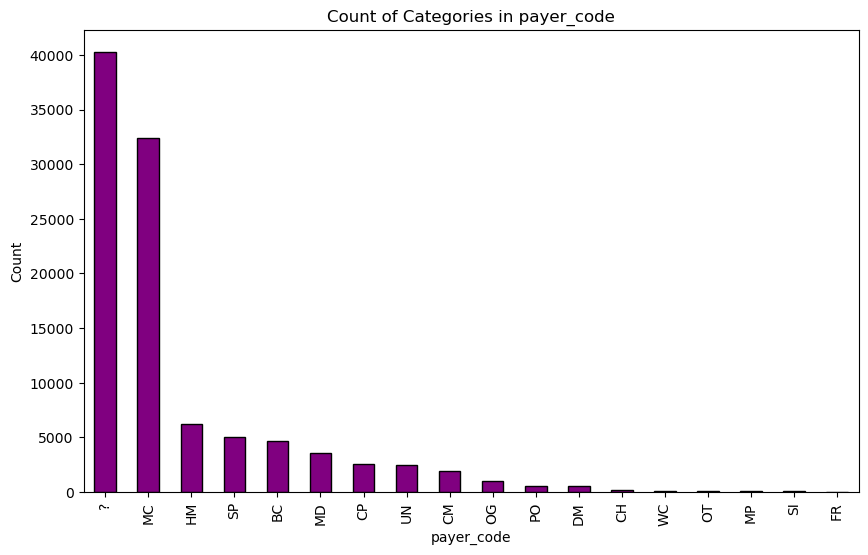

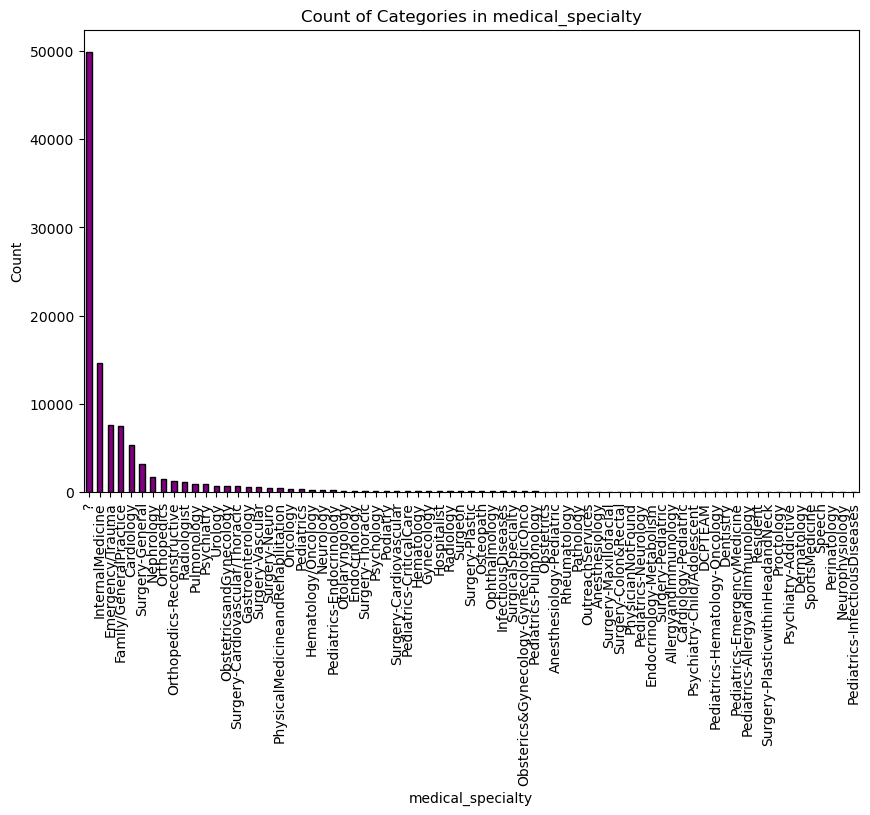

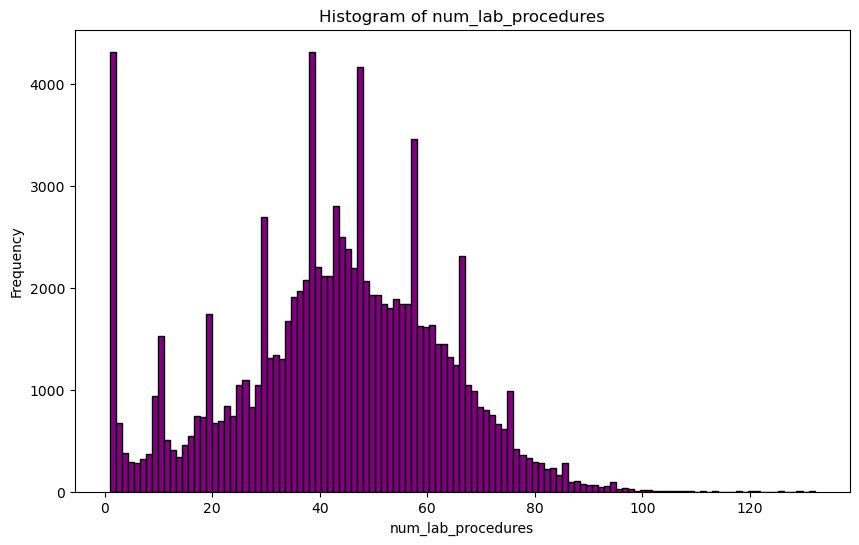

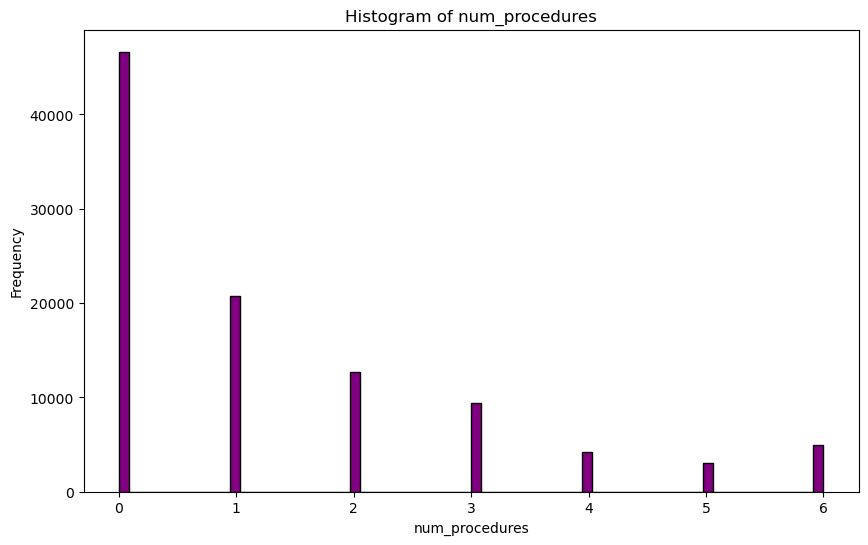

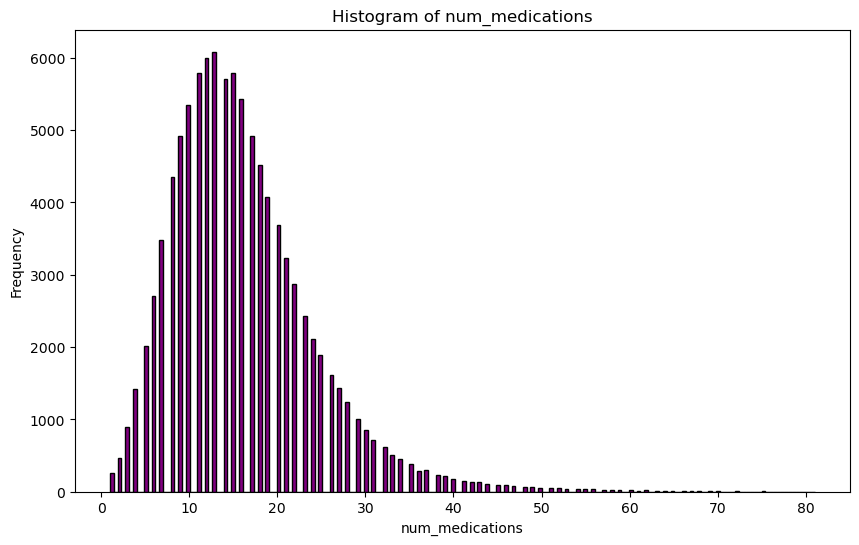

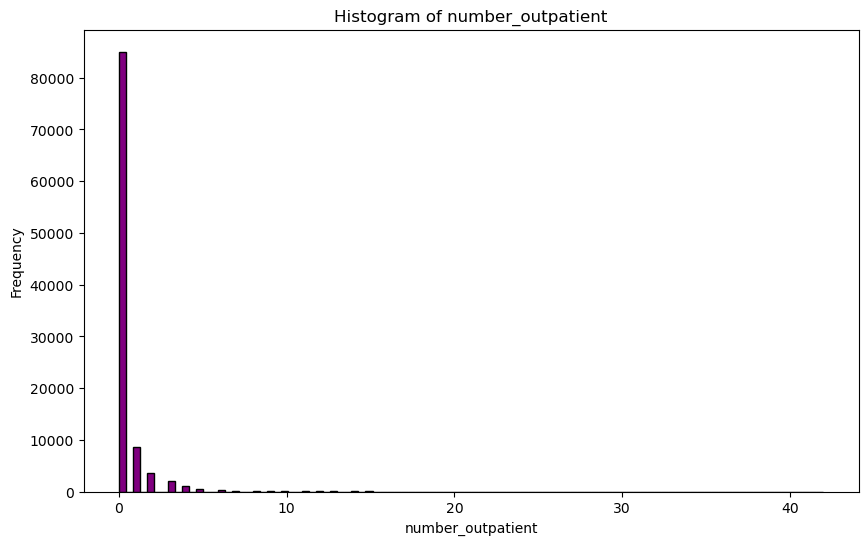

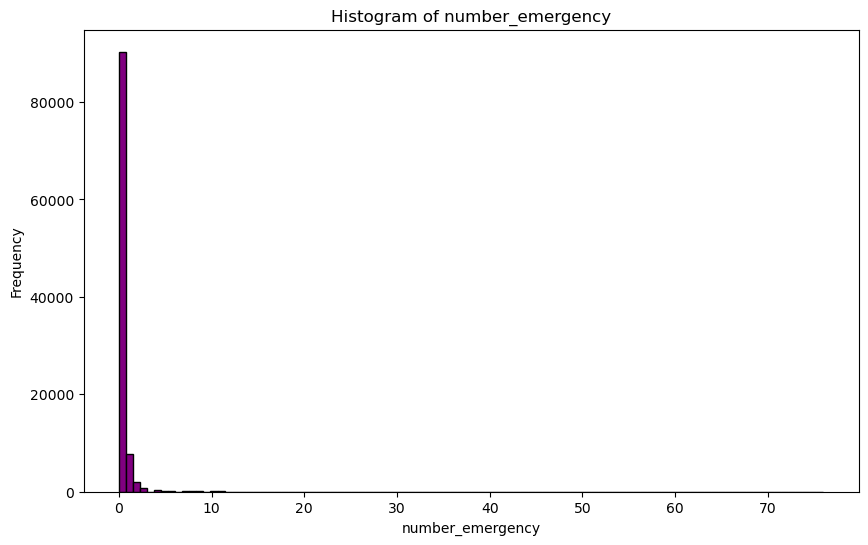

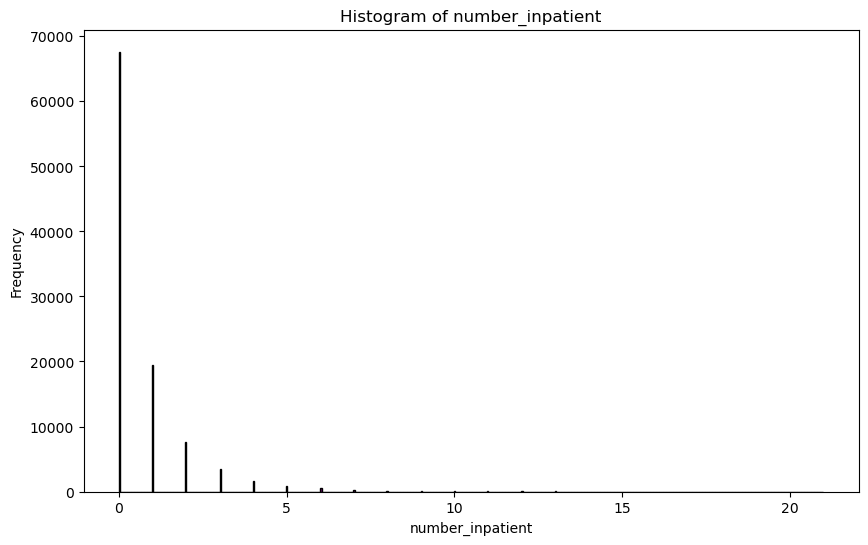

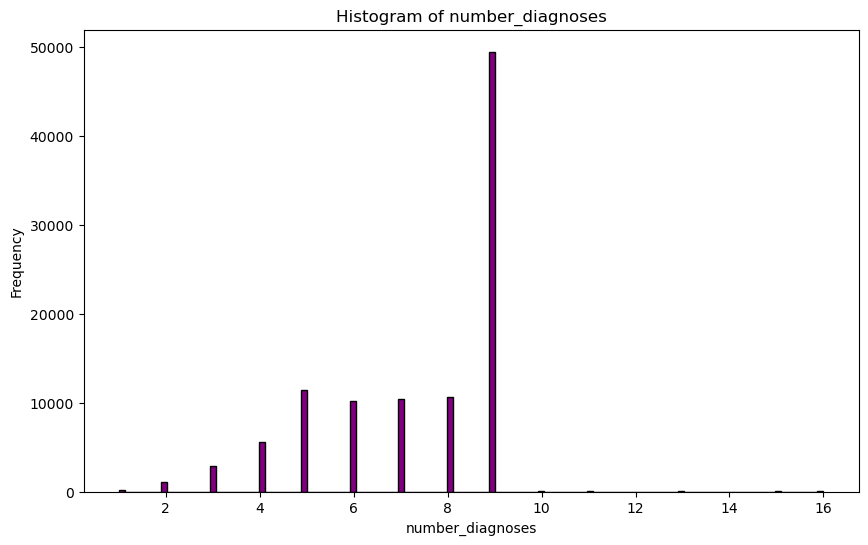

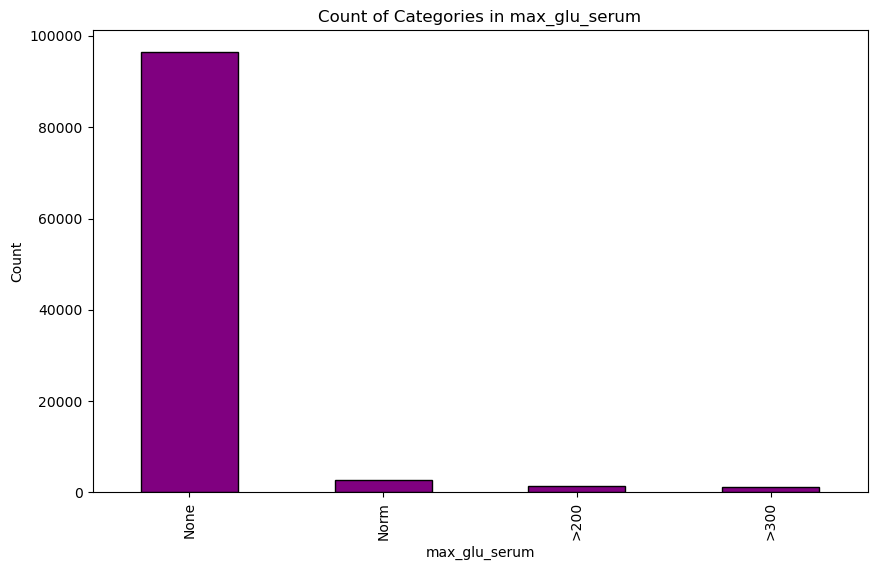

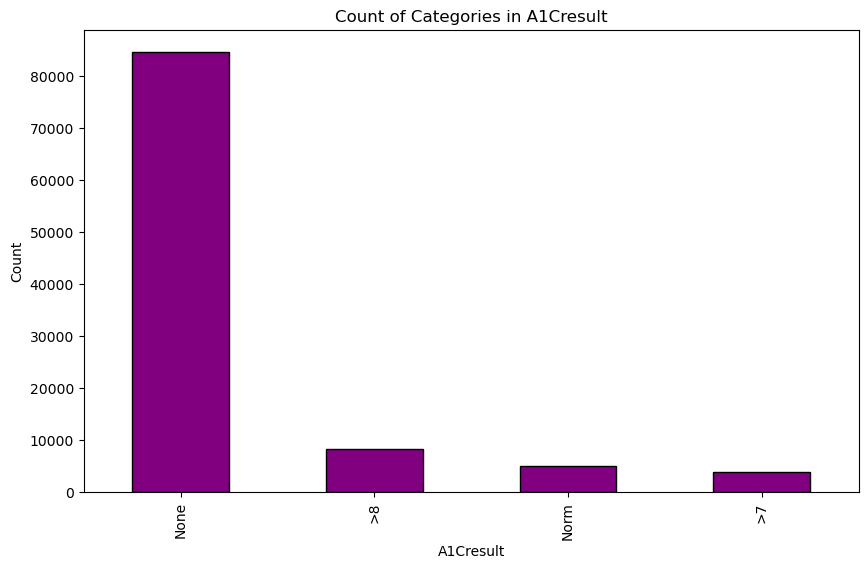

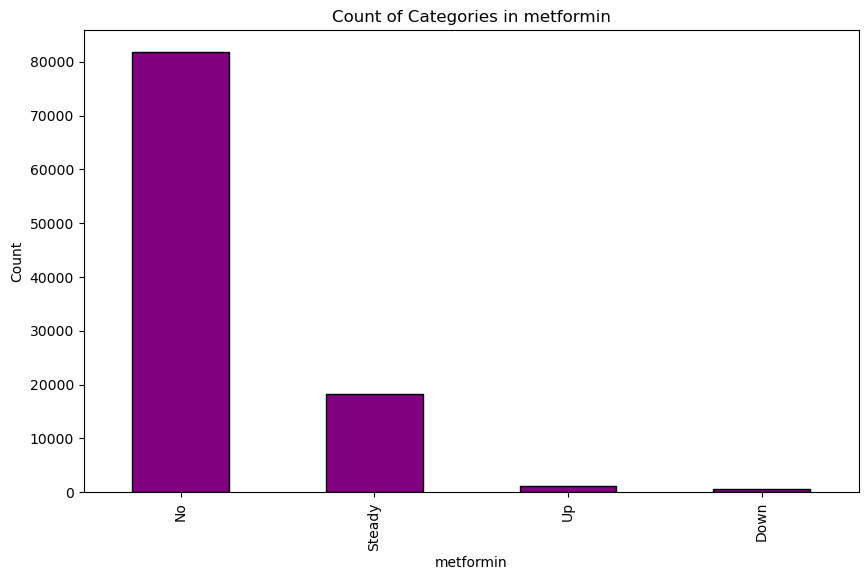

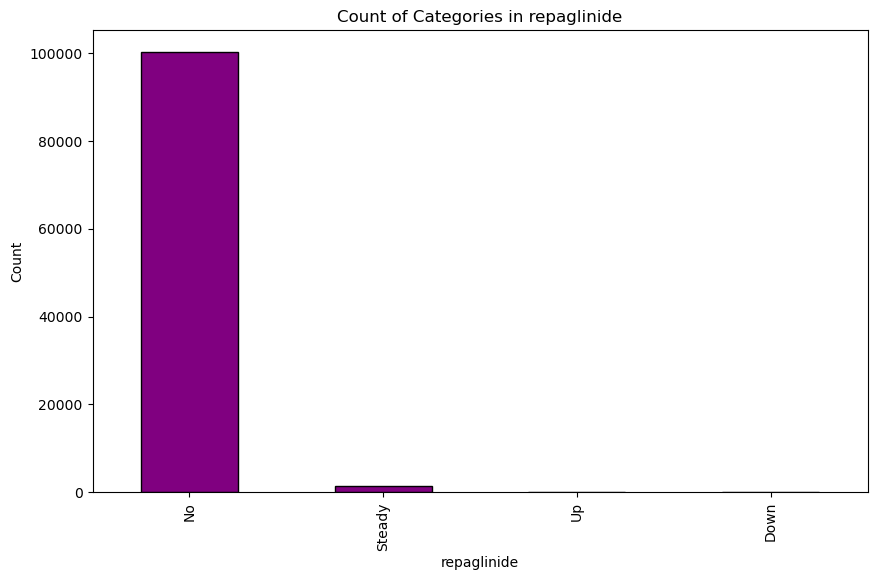

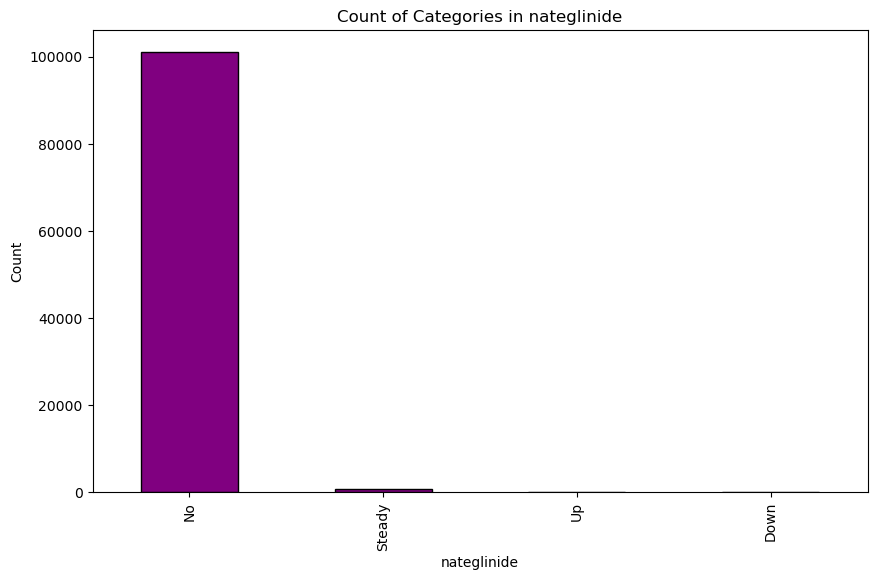

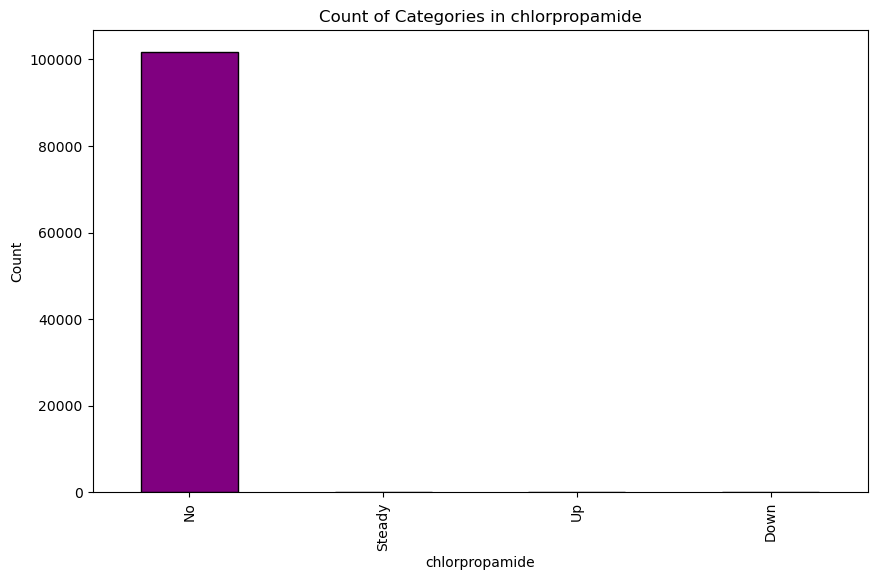

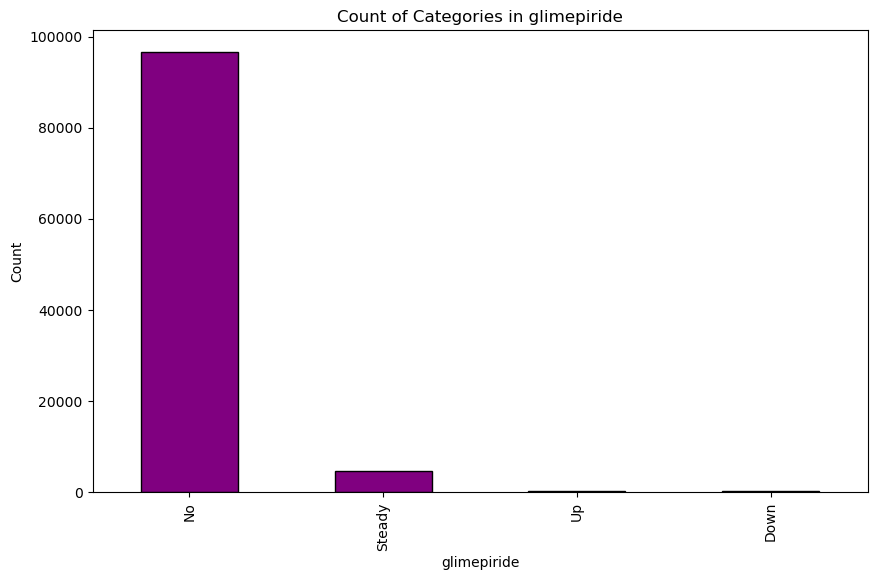

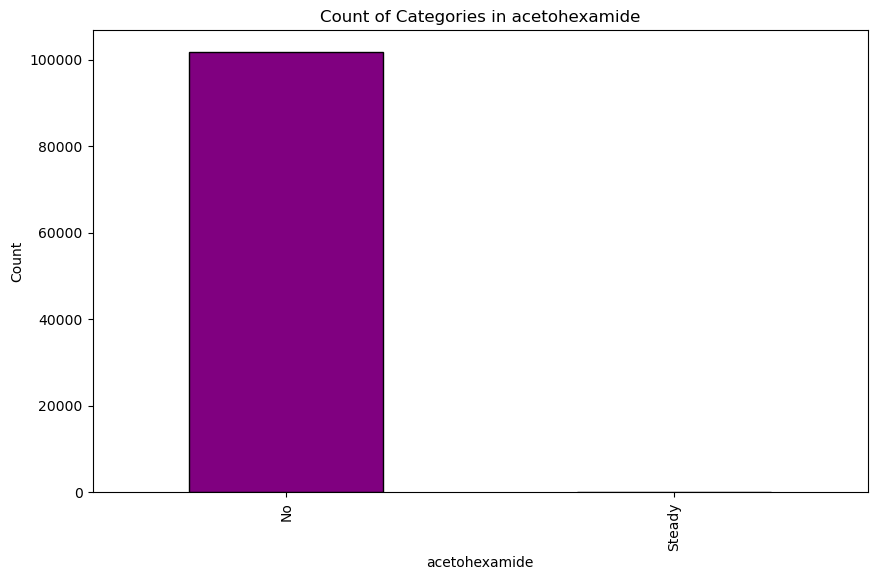

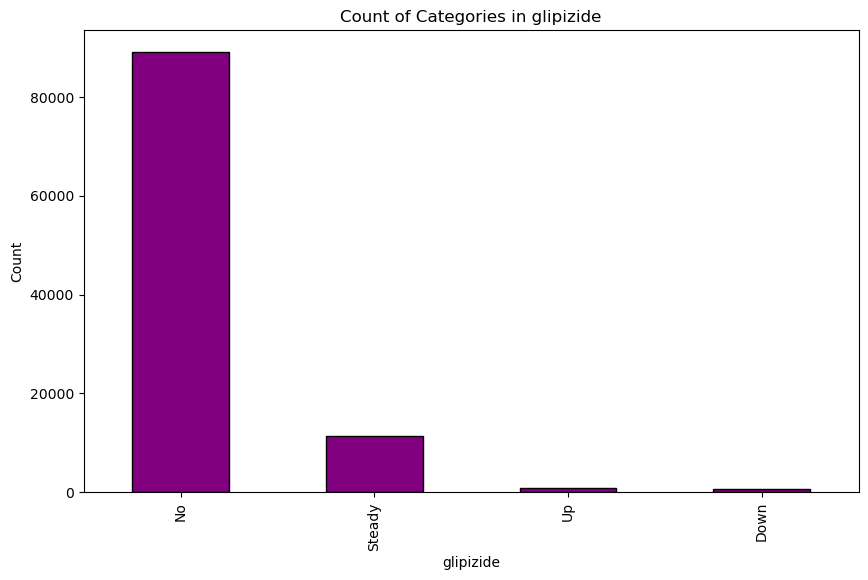

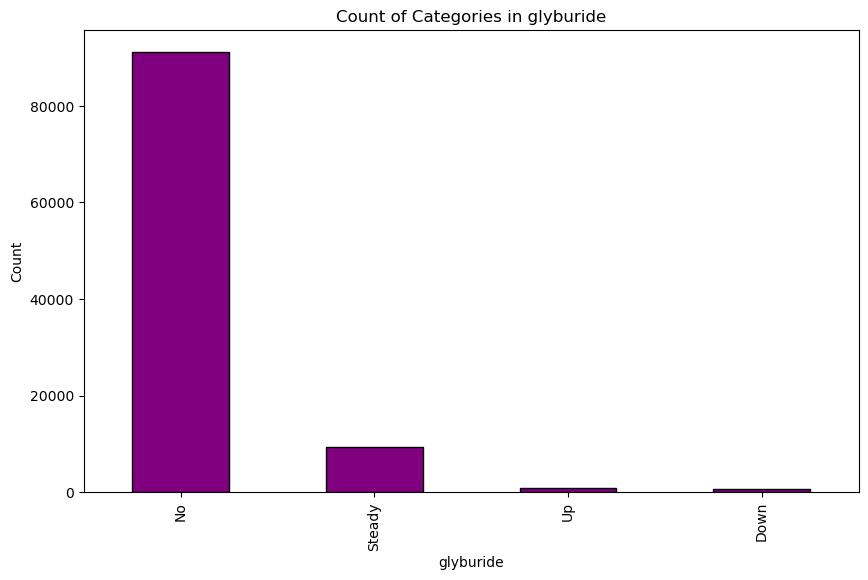

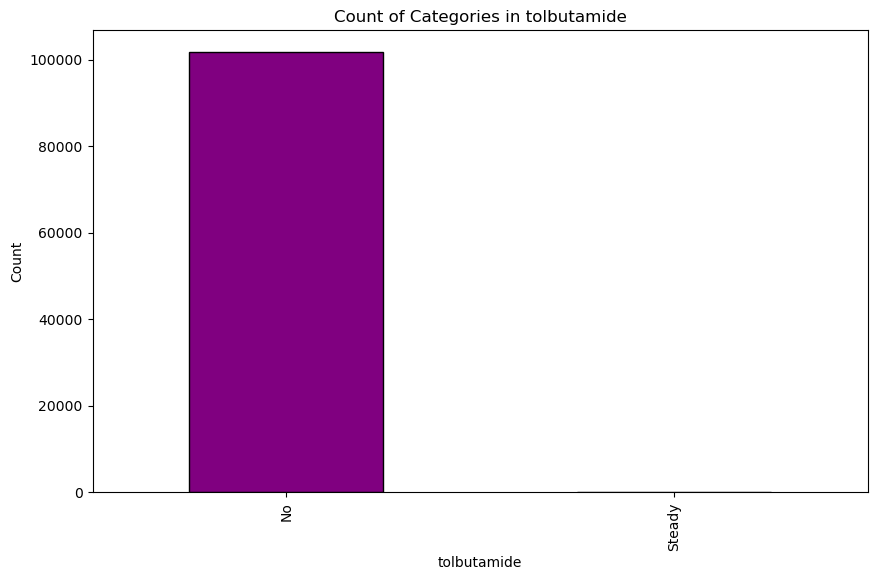

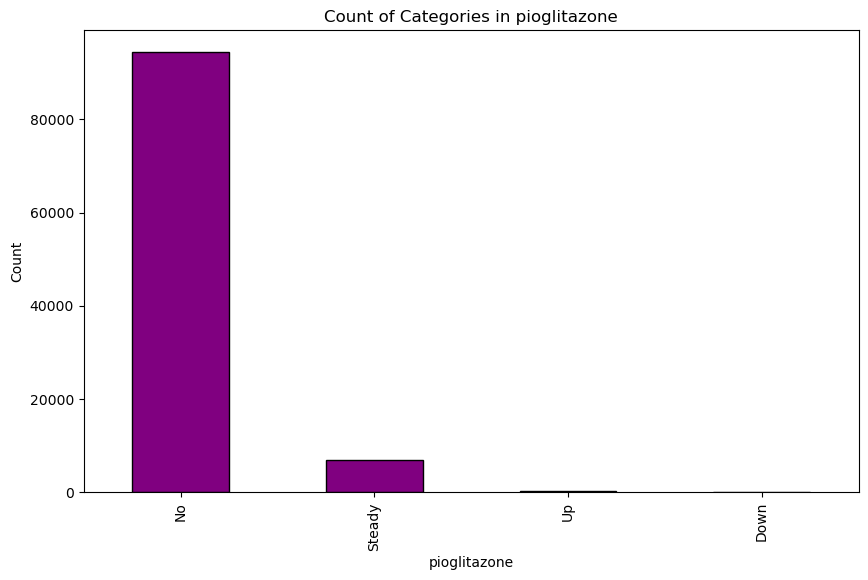

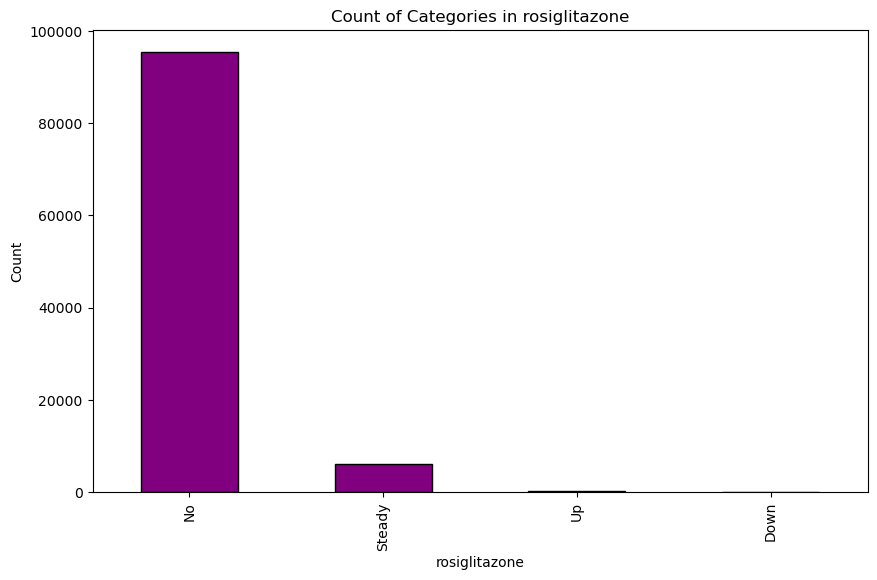

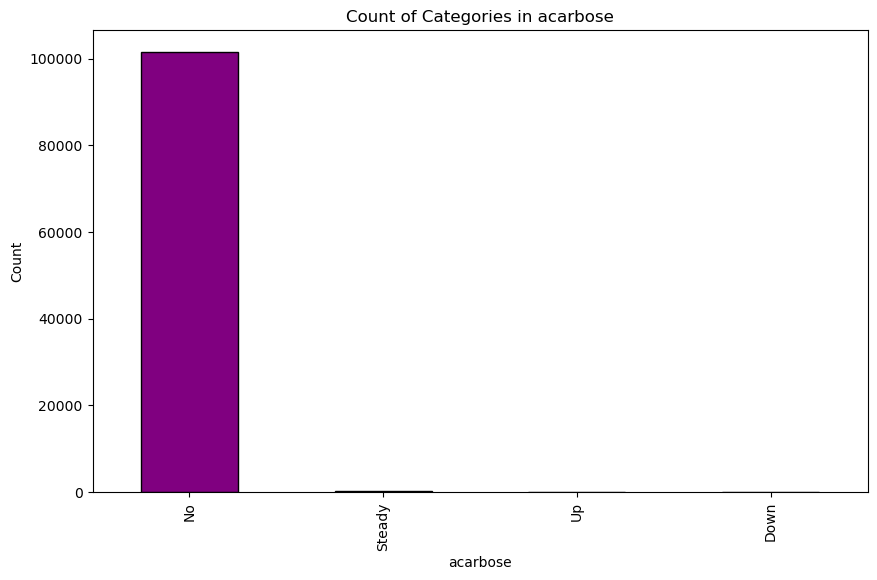

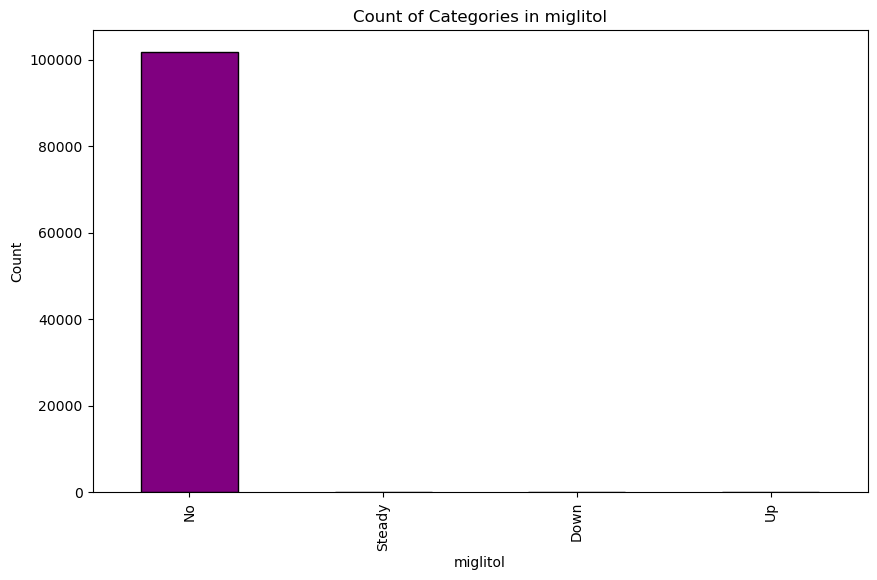

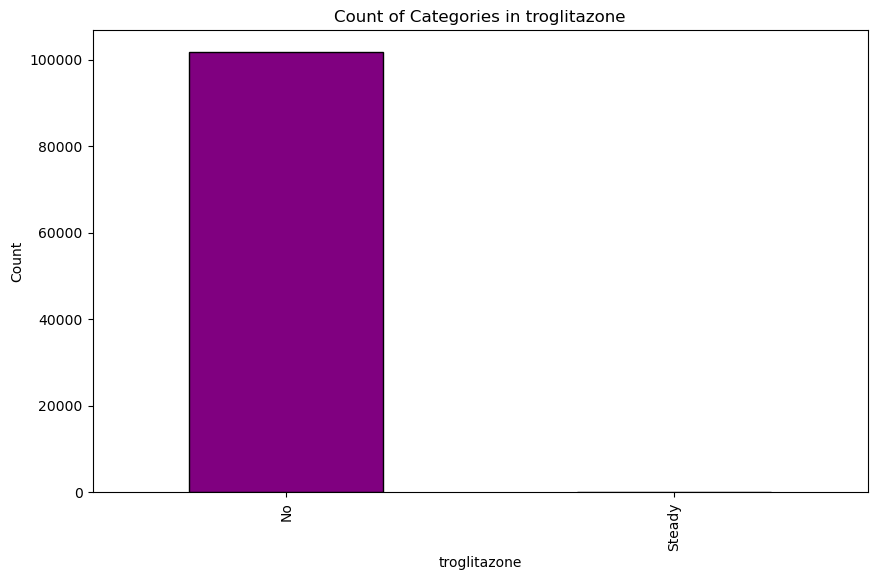

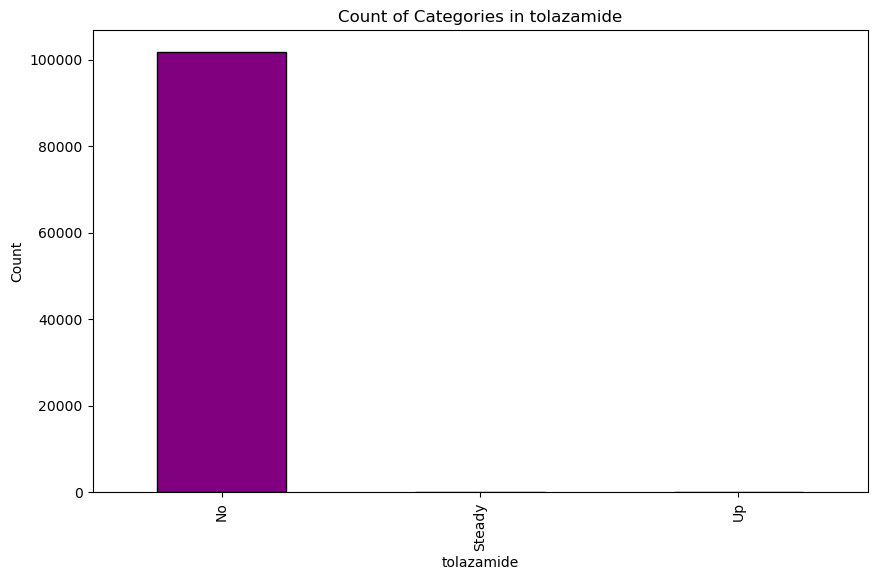

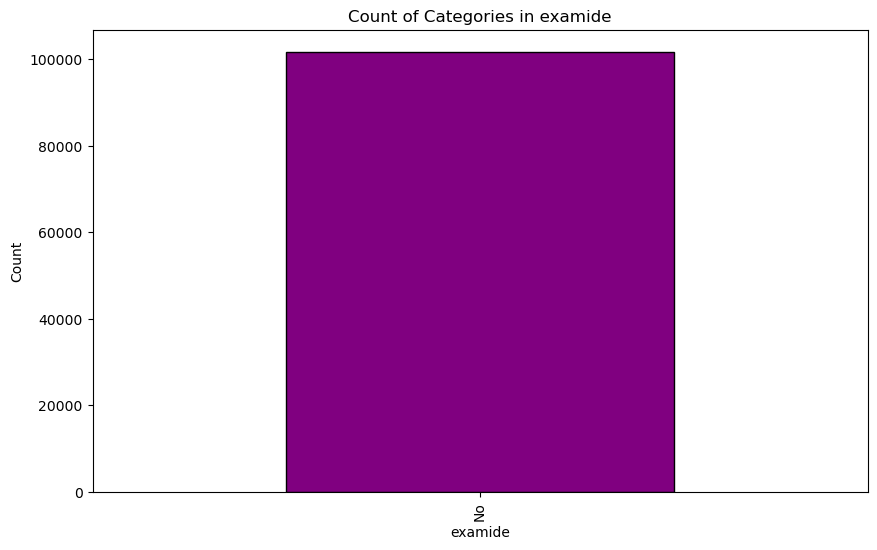

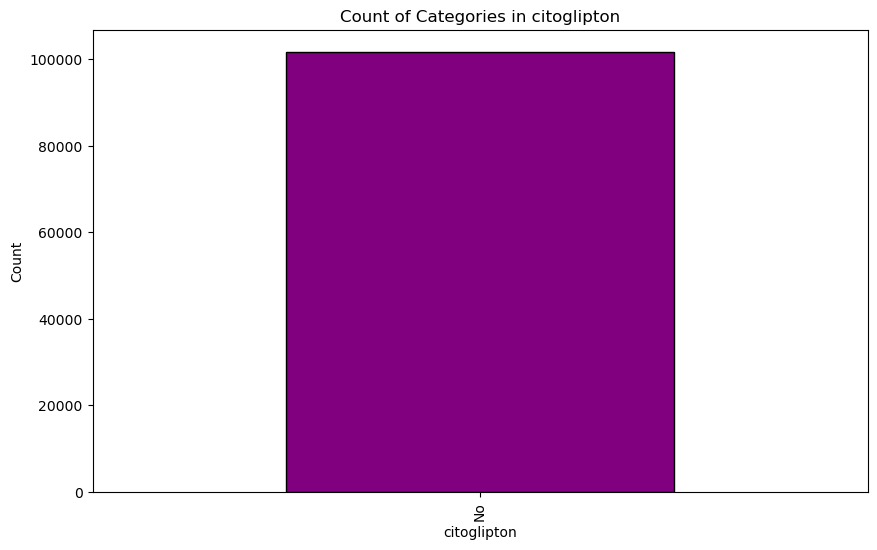

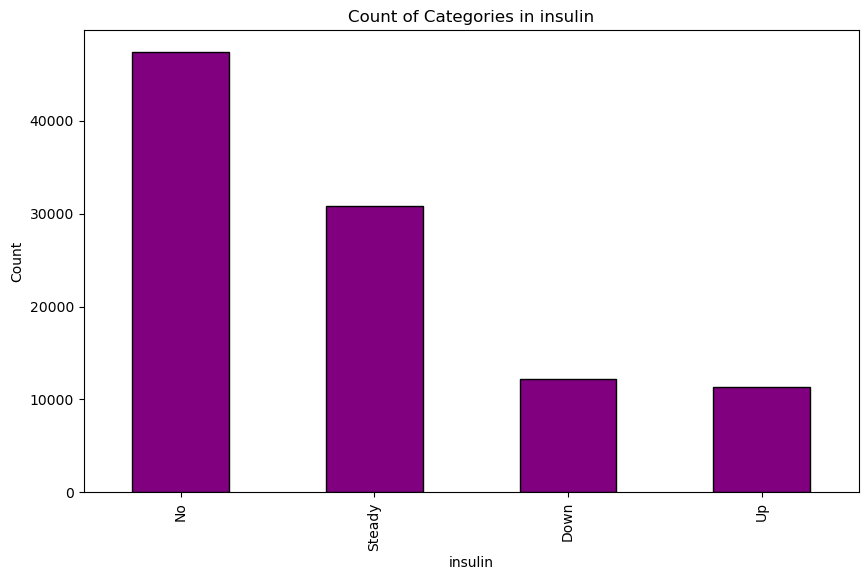

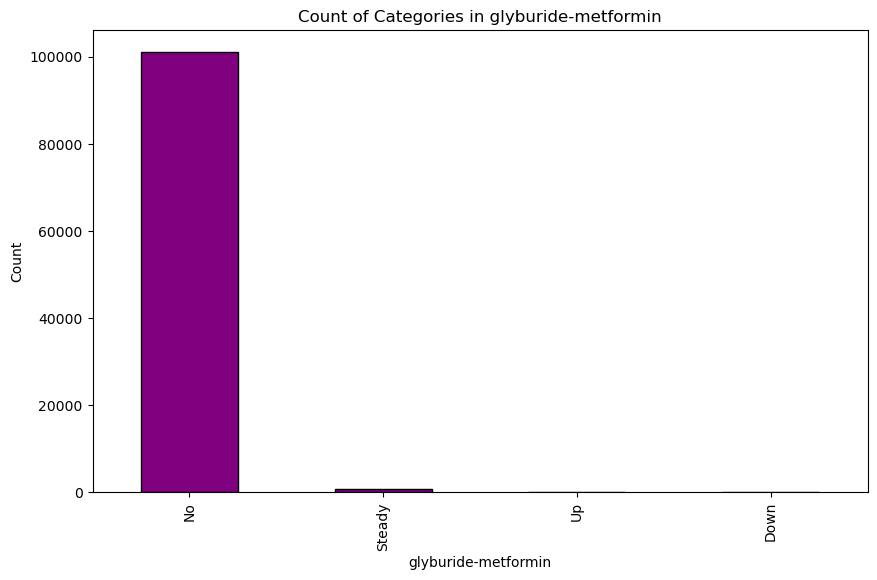

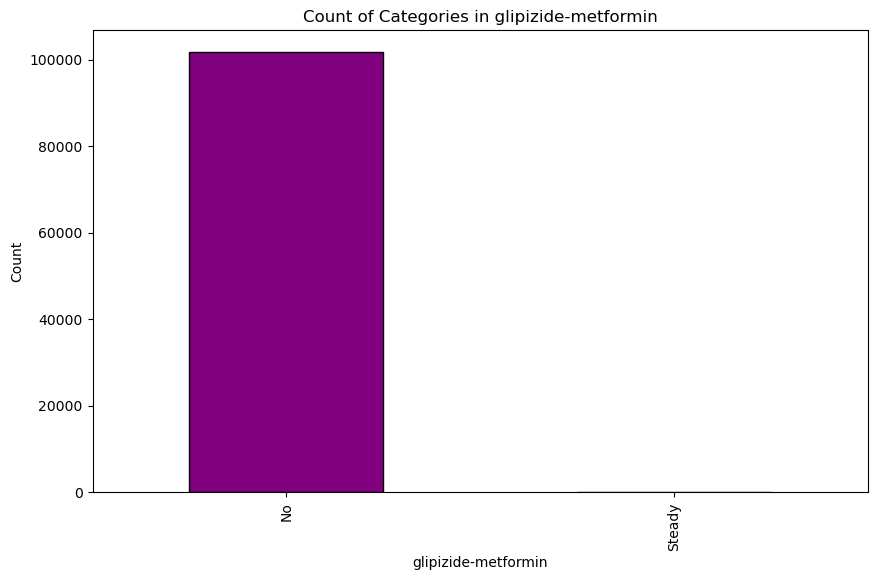

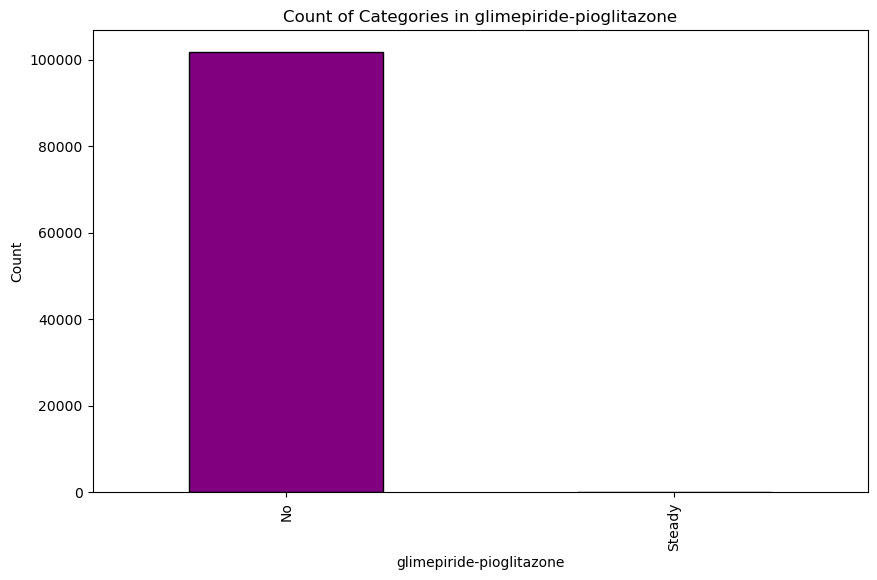

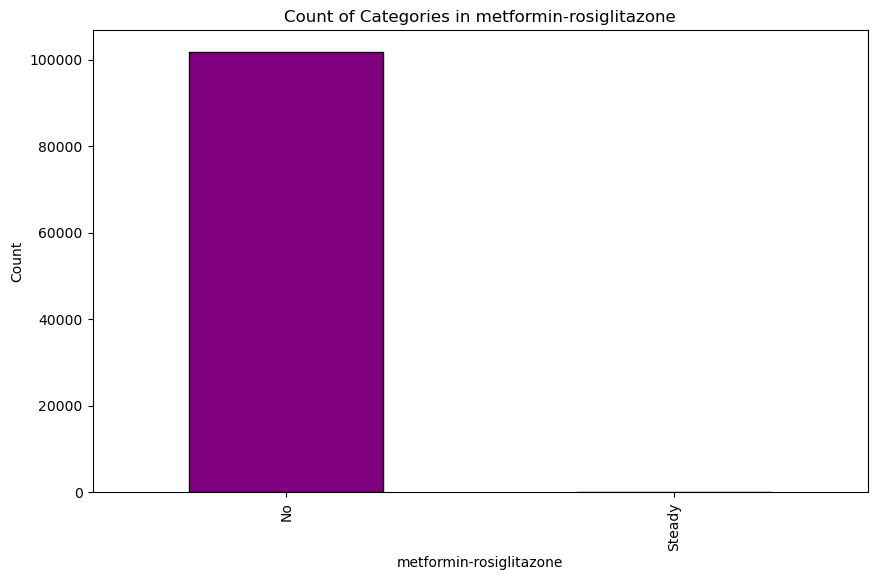

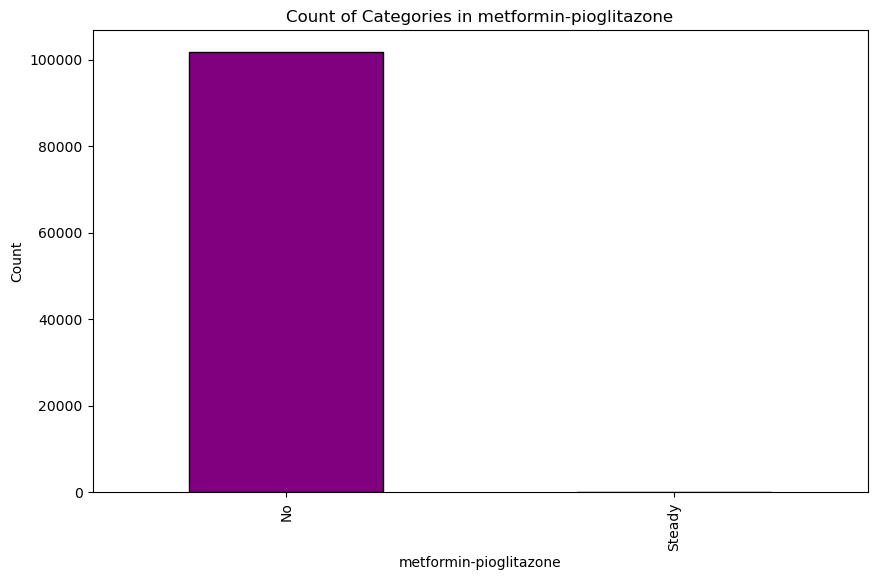

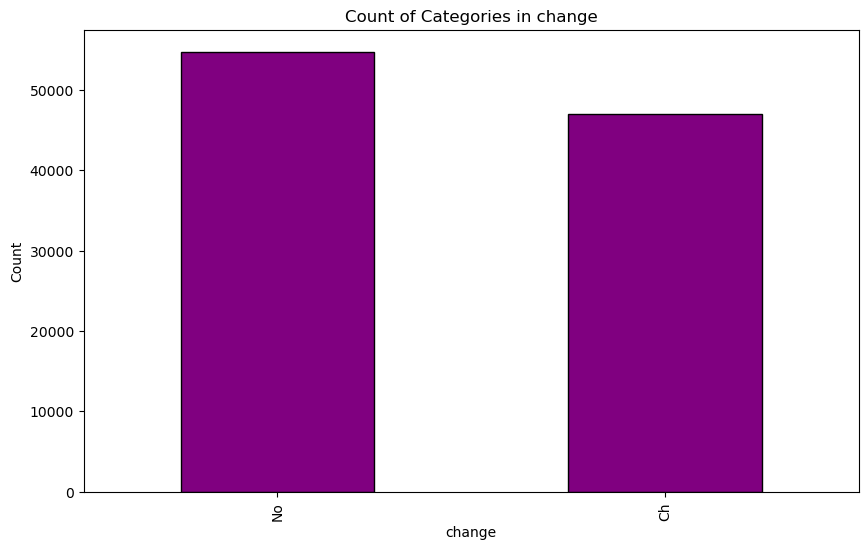

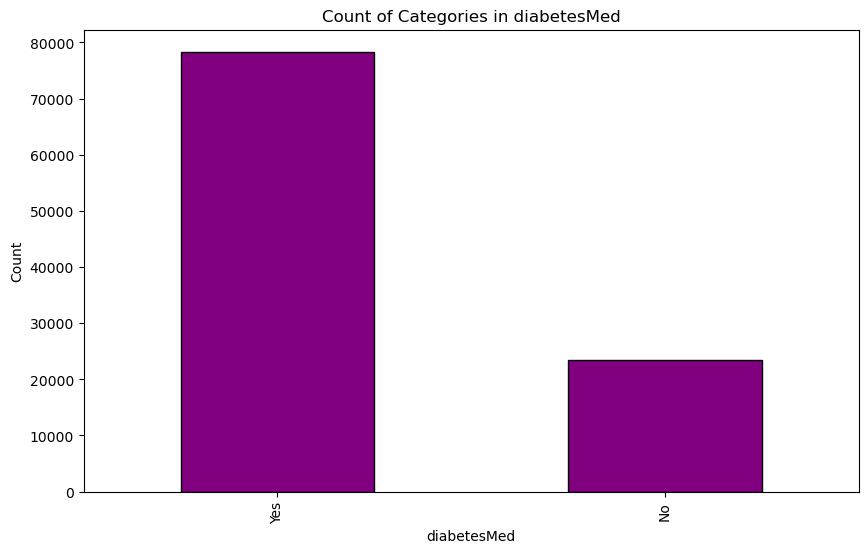

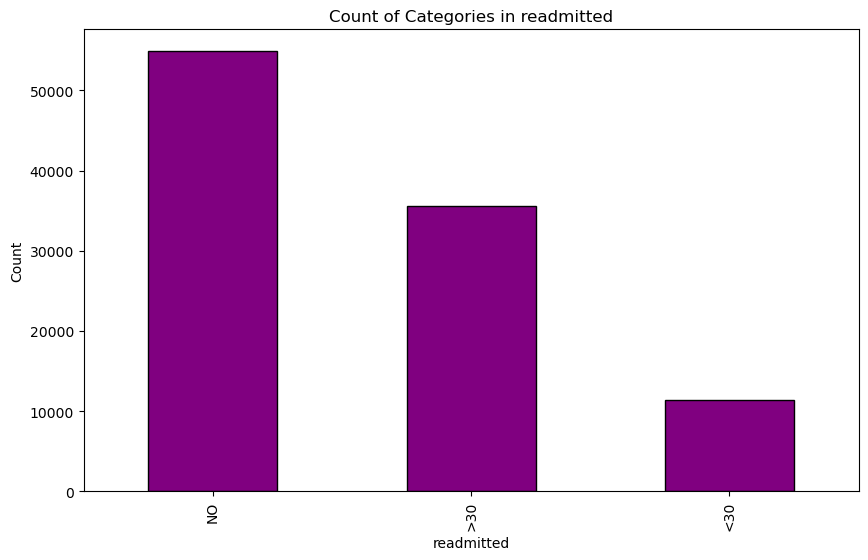

In [8]:

def freedman_diaconis_bins(data):
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    if iqr == 0:
        bins = 100  #
    else:
        h = 2 * iqr / (len(data) ** (1/3))
        bins = int((data.max() - data.min()) / h)
    return bins
for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:  # Check if the column is numerical
        num_bins = freedman_diaconis_bins(df[column])
        df[column].plot(kind='hist', bins=num_bins, color='purple', edgecolor='black', figsize=(10, 6))
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    elif (column not in ["diag_1" , "diag_2" , "diag_3"]):
        category_counts = df[column].value_counts()
        category_counts.plot(kind='bar', color='purple', edgecolor='black', figsize=(10, 6))
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count of Categories in {column}')
        plt.show()

In [9]:
nu = df.nunique().reset_index()
nu

,index,0
0,encounter_id,101766
1,patient_nbr,71518
2,race,6
3,gender,3
4,age,10
5,weight,10
6,admission_type_id,8
7,discharge_disposition_id,26
8,admission_source_id,17
9,time_in_hospital,14


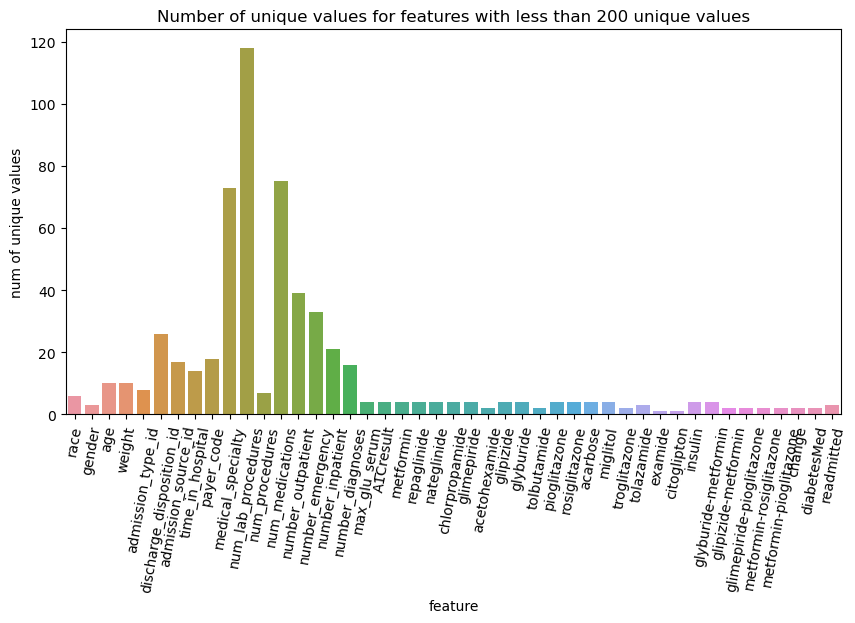

In [10]:
nu = df.nunique().reset_index()
nu = nu[nu[0] < 200]  # Filter based on the number of unique values
plt.figure(figsize=(10, 5))
plt.title("Number of unique values for features with less than 200 unique values")
plt.xticks(rotation=80)
nu.columns = ['feature', 'num of unique values']
ax = sns.barplot(x='feature', y='num of unique values', data=nu)

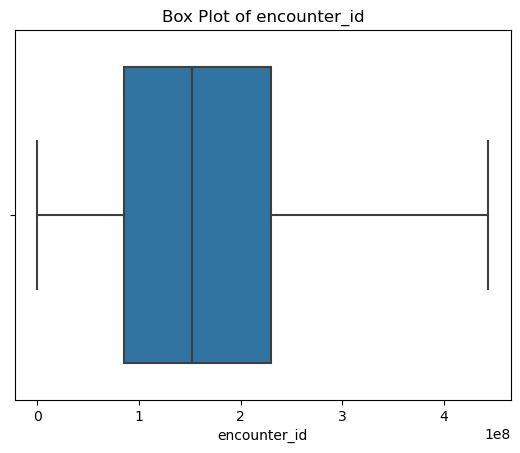

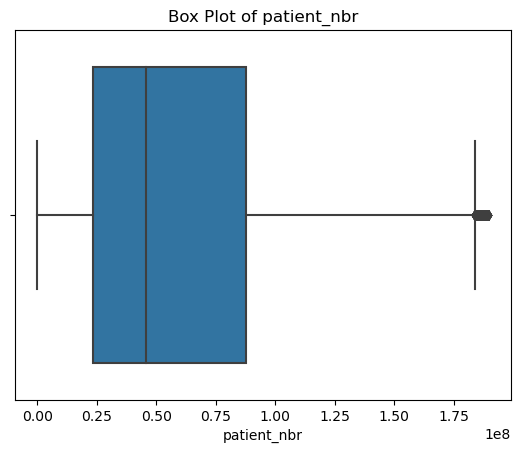

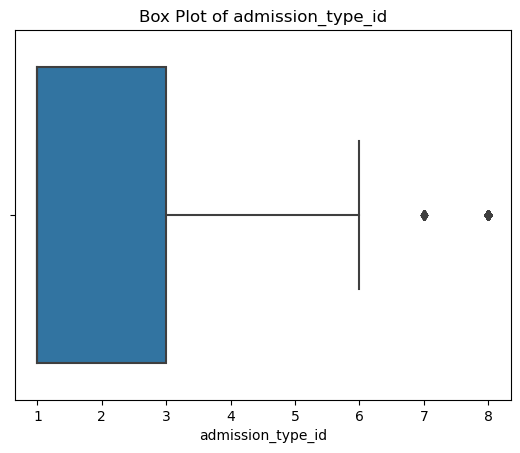

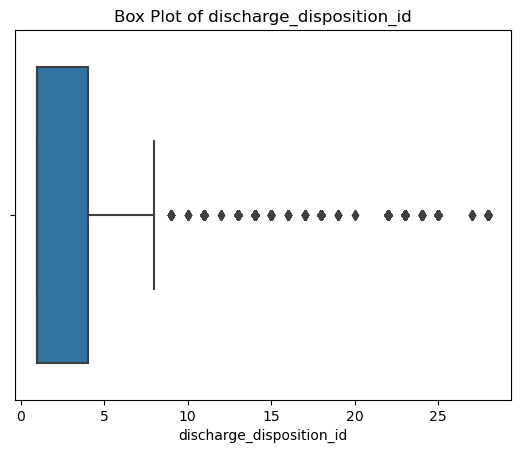

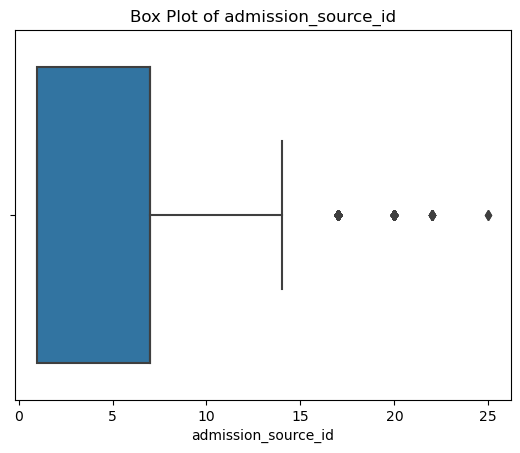

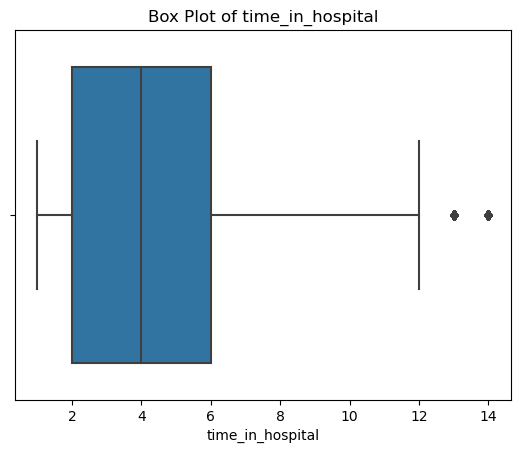

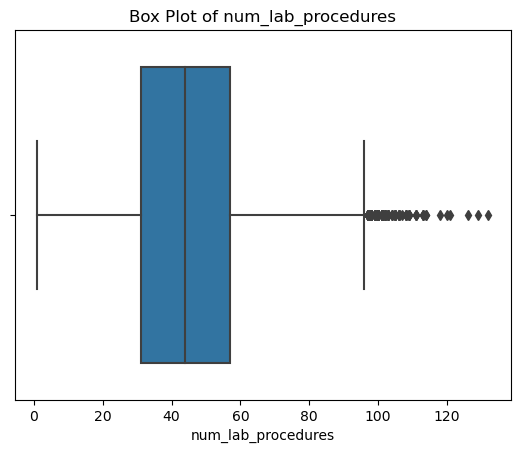

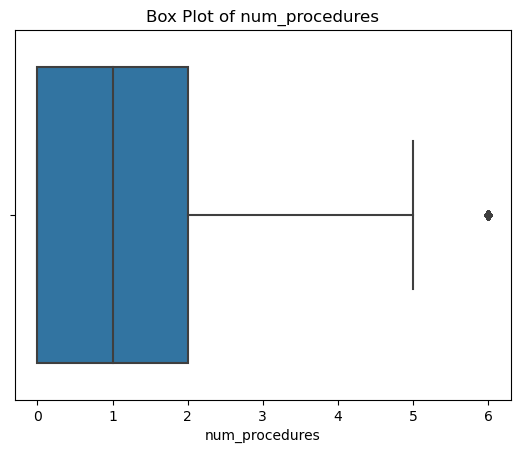

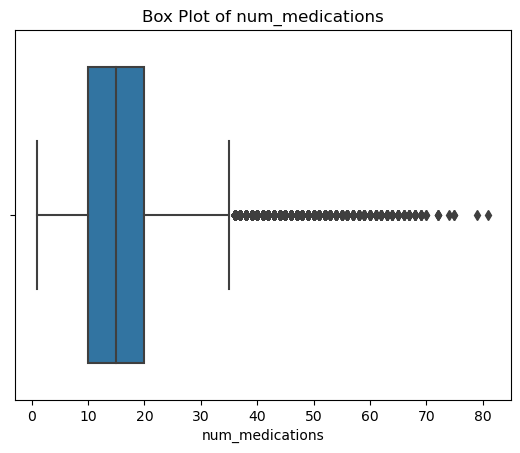

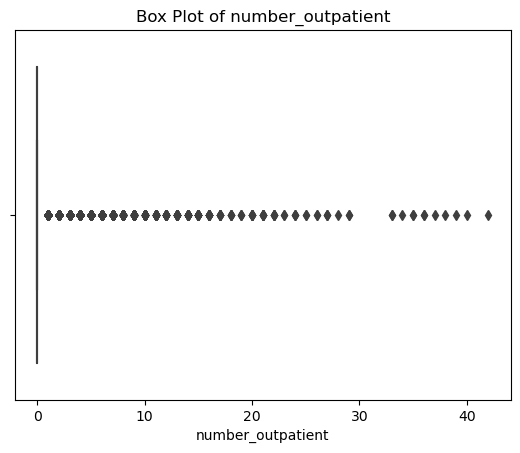

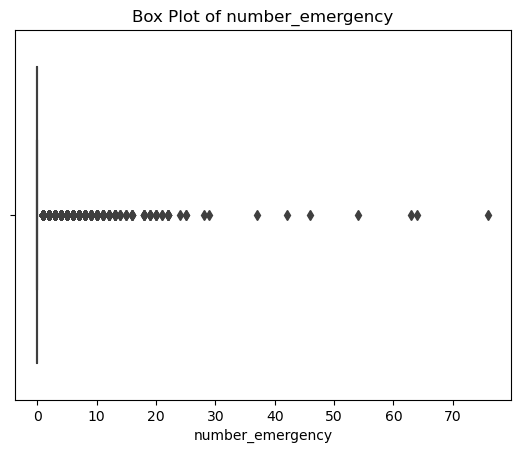

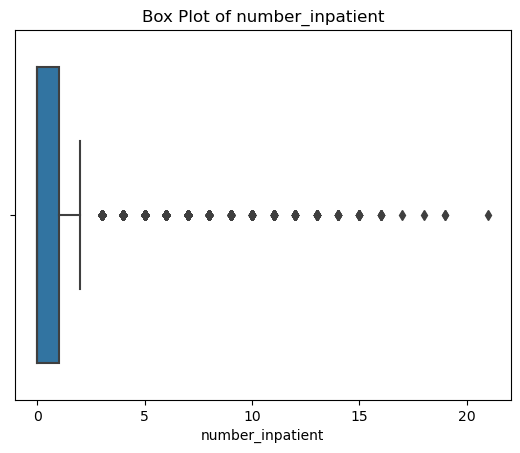

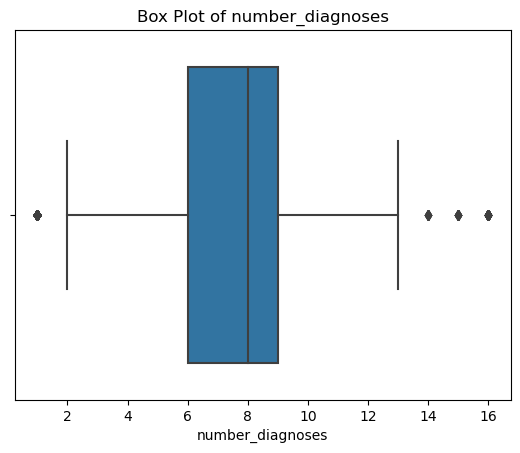

In [11]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [12]:
non_numerical_columns = df.select_dtypes(exclude='number').columns
category_counts = {}

for col in non_numerical_columns:
    category_counts[col] = df[col].value_counts()
    
for col, counts in category_counts.items():
    print(f"Category counts for column '{col}':")
    print(counts)
    print()

Category counts for column 'race':
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Category counts for column 'gender':
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Category counts for column 'age':
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Category counts for column 'weight':
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Category counts for column 'payer_code':
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG    

In [13]:
df.replace("?", np.nan, inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [14]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# handle missing values

In [15]:
#handle numerical missing vals
col = df.select_dtypes(include=[np.number,'float']).columns.to_list()
selected_data = df[col]
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(selected_data), columns=selected_data.columns)

In [16]:
df.drop(columns = ["weight",'payer_code', 'medical_specialty'] , inplace =True)

In [17]:
cols_with_null = ['race',  'diag_1', 'diag_2', 'diag_3']
for col in cols_with_null:
    null_indices = df[df[col].isnull()].index
    for idx in null_indices:
        random_value = np.random.choice(df[~df[col].isnull()][col])
        df.loc[idx, col] = random_value

## drop cols with just 1 value

In [18]:
df.drop(columns= ['citoglipton' , 'examide'] , inplace = True)

## Handle noise vals

In [19]:
df = df[(df["gender"] == "Female") | (df["gender"] == "Male")]

In [20]:
from sklearn.impute import KNNImputer

def impute_non_numeric(column_names, df):
    for column_name in column_names:
        if df[column_name].dtype == 'O':
            non_numeric_indices = df[df[column_name].apply(lambda x: not isinstance(x, (int, float)))].index.tolist()
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            imputer = KNNImputer(n_neighbors=5)
            df[column_name] = imputer.fit_transform(df[column_name].values.reshape(-1, 1))
            df[column_name] = df[column_name].astype(float)
            
            if len(non_numeric_indices) > 0:
                non_numeric_data = df.loc[non_numeric_indices, column_name]
                if not non_numeric_data.empty:
                    df.loc[non_numeric_indices, column_name] = non_numeric_data.astype(str)
        
    return df

df = impute_non_numeric(['diag_1', 'diag_2', 'diag_3'], df)

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
category_counts = {}
for col in df.columns:
    category_counts[col] = df[col].value_counts()
    
for col, counts in category_counts.items():
    print(f"Category counts for column '{col}':")
    print(counts)
    print()

Category counts for column 'encounter_id':
2278392      1
190791024    1
190789722    1
190786806    1
190785018    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101763, dtype: int64

Category counts for column 'patient_nbr':
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71515, dtype: int64

Category counts for column 'race':
Caucasian          77803
AfricanAmerican    19678
Hispanic            2081
Other               1539
Asian                662
Name: race, dtype: int64

Category counts for column 'gender':
Female    54708
Male      47055
Name: gender, dtype: int64

Category counts for column 'age':
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       6

## Labeling

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [23]:
df.drop(columns=['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin'], inplace=True)

# remove outliers

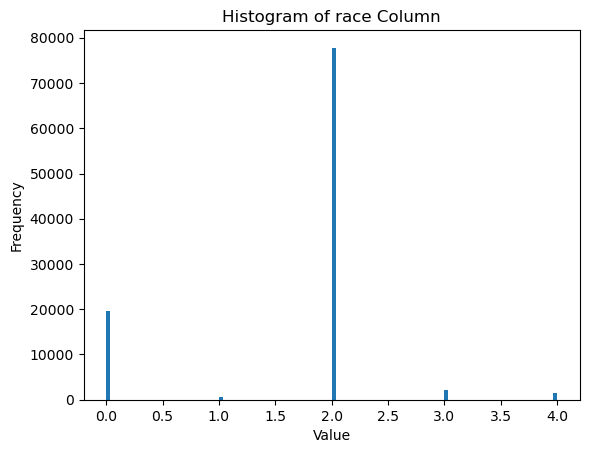

2    77803
0    19678
3     2081
4     1539
1      662
Name: race, dtype: int64


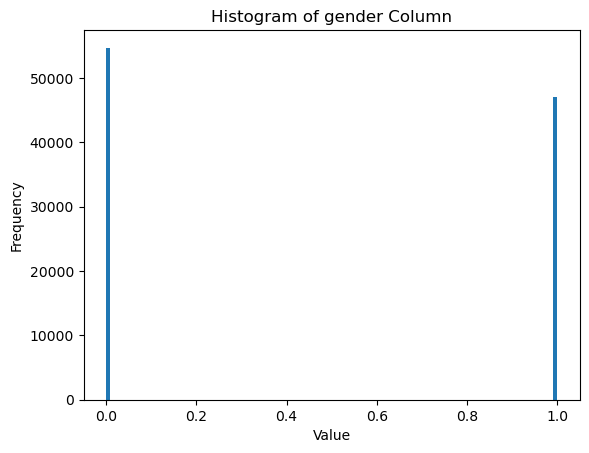

0    54708
1    47055
Name: gender, dtype: int64


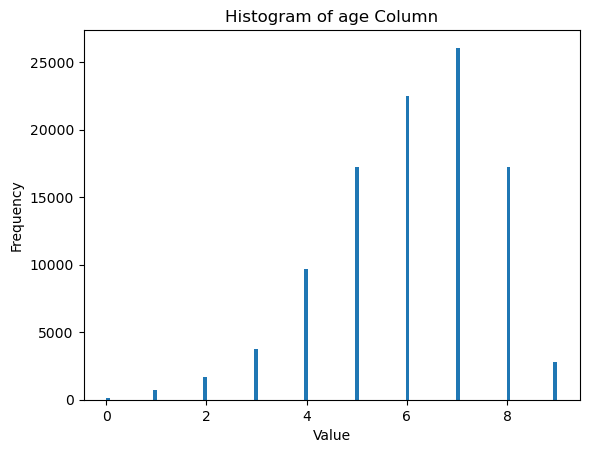

7    26066
6    22482
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: age, dtype: int64


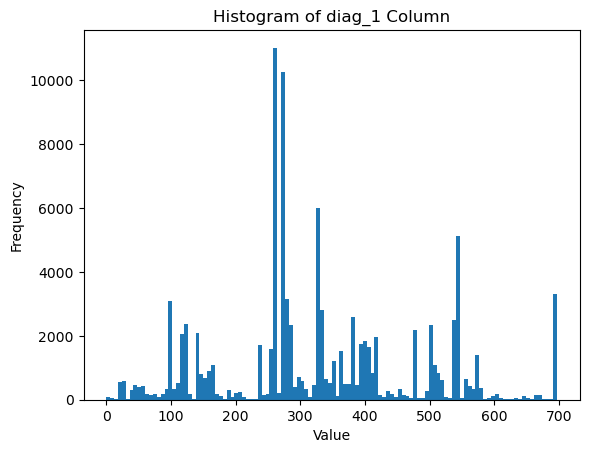

276    6863
263    6581
541    4016
259    3614
325    3509
       ... 
215      20
237      20
148      20
662      20
196      20
Name: diag_1, Length: 310, dtype: int64


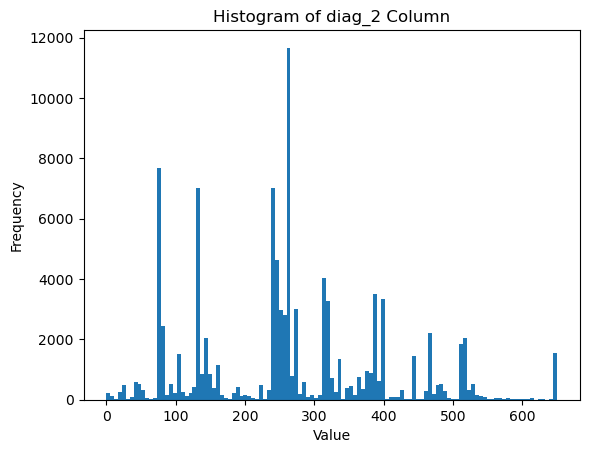

133    6624
261    6602
78     5953
260    4993
239    3680
       ... 
111      20
369      20
13       20
411      20
155      20
Name: diag_2, Length: 266, dtype: int64


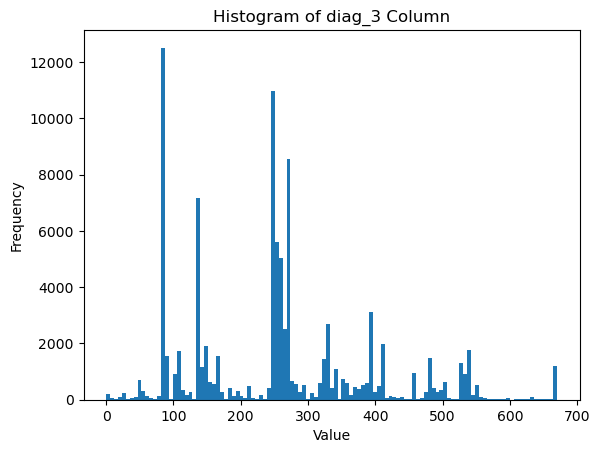

86     11104
246     8085
139     5058
260     4785
269     4533
       ...  
299       20
554       20
113       20
90        20
295       20
Name: diag_3, Length: 256, dtype: int64


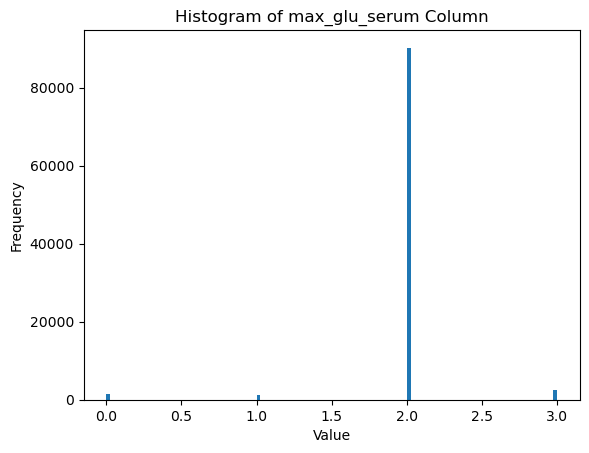

2    90252
3     2451
0     1411
1     1199
Name: max_glu_serum, dtype: int64


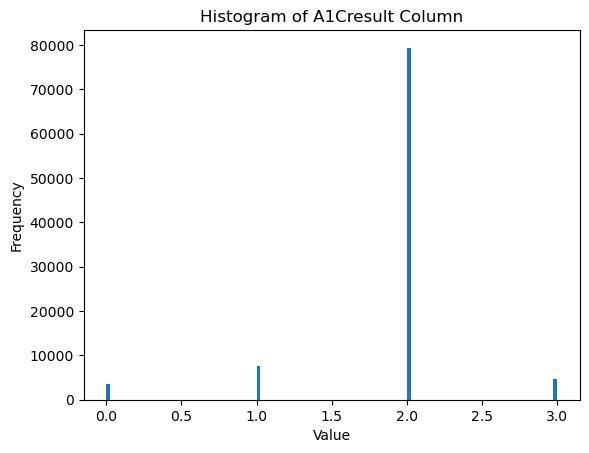

2    79360
1     7709
3     4644
0     3600
Name: A1Cresult, dtype: int64


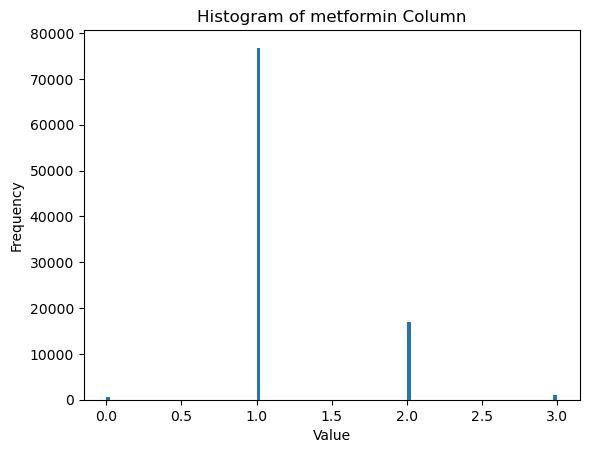

1    76814
2    16959
3      992
0      548
Name: metformin, dtype: int64


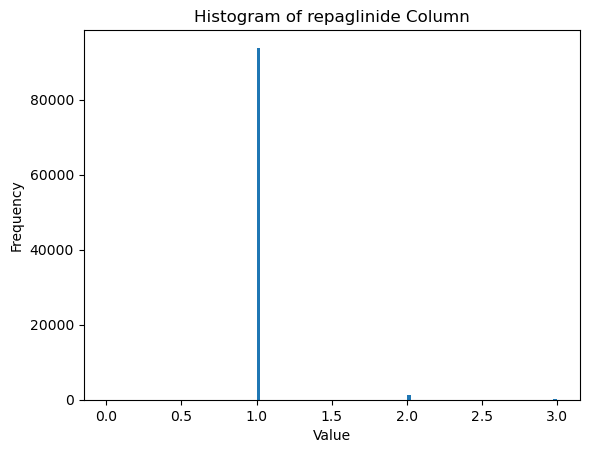

1    93848
2     1320
3      102
0       43
Name: repaglinide, dtype: int64


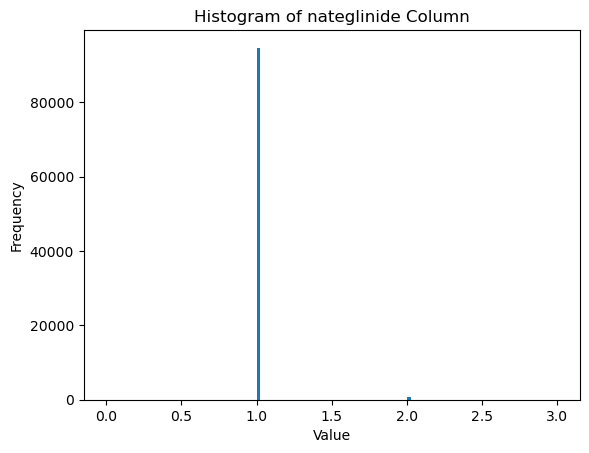

1    94647
2      634
3       21
Name: nateglinide, dtype: int64


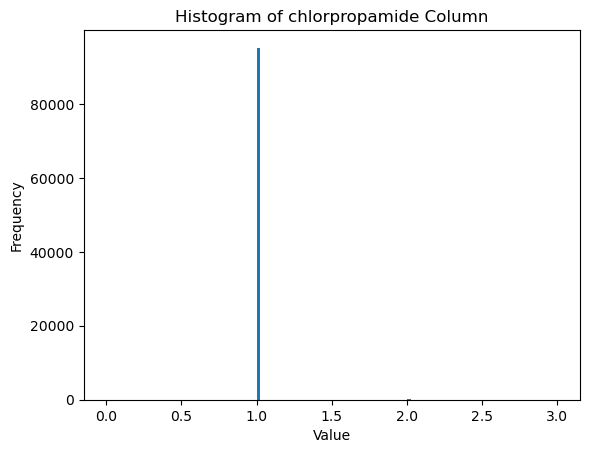

1    95219
2       76
Name: chlorpropamide, dtype: int64


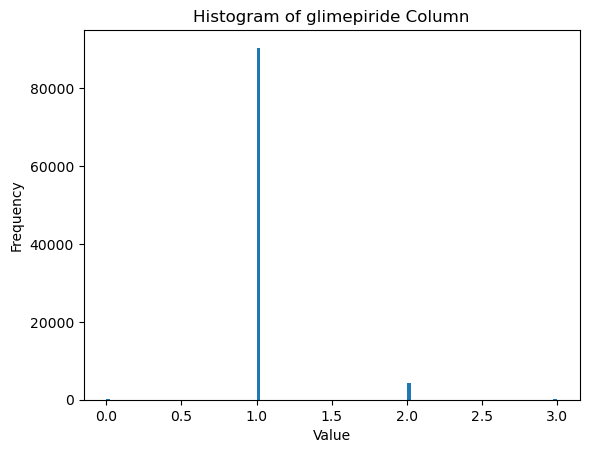

1    90421
2     4378
3      309
0      187
Name: glimepiride, dtype: int64


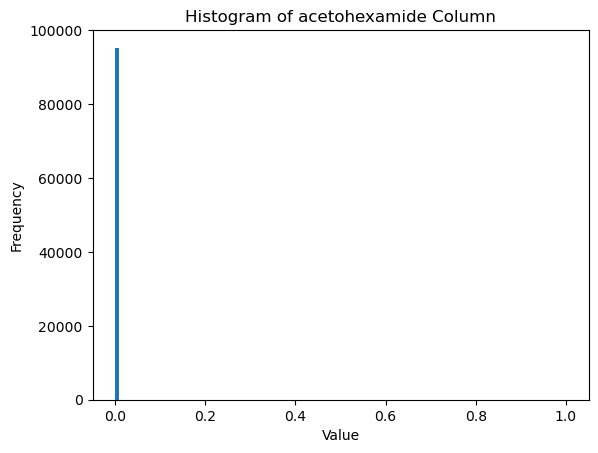

0    95294
Name: acetohexamide, dtype: int64


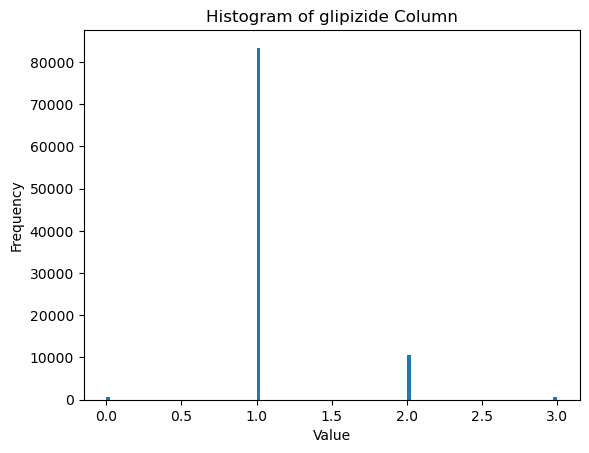

1    83366
2    10678
3      719
0      531
Name: glipizide, dtype: int64


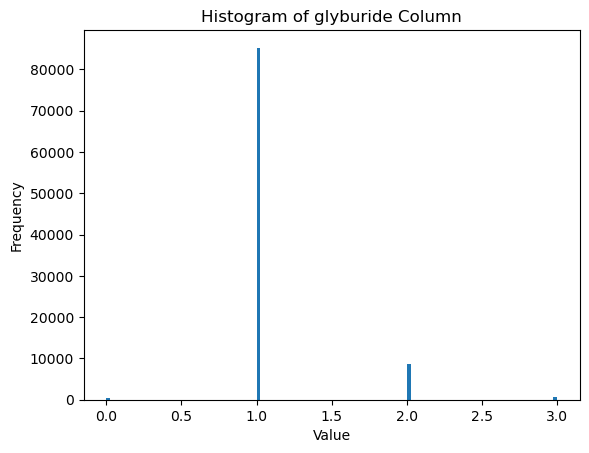

1    85231
2     8768
3      760
0      535
Name: glyburide, dtype: int64


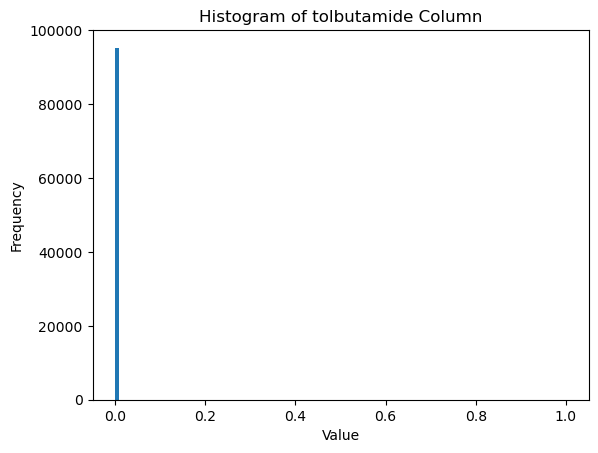

0    95274
1       20
Name: tolbutamide, dtype: int64


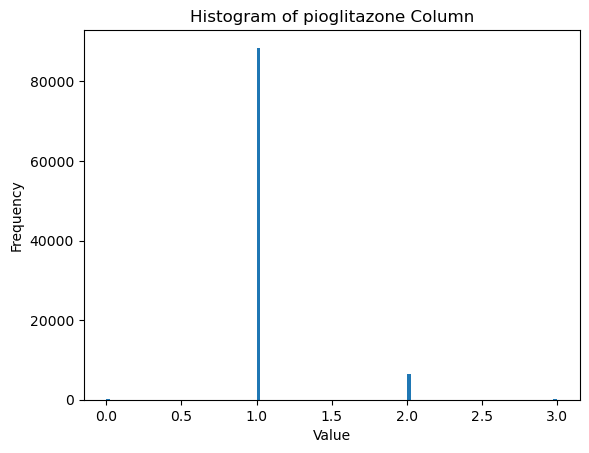

1    88436
2     6530
3      216
0      112
Name: pioglitazone, dtype: int64


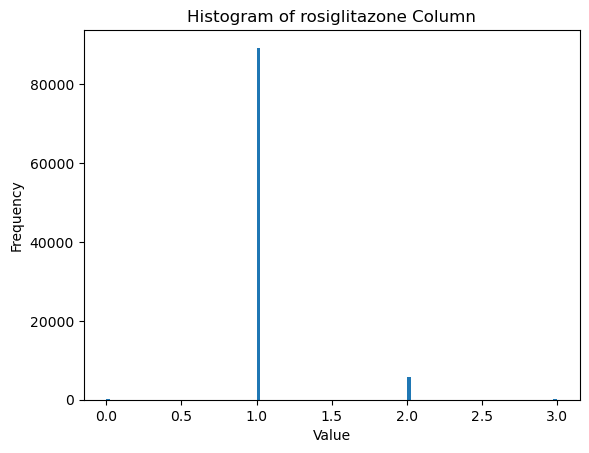

1    89294
2     5751
3      164
0       85
Name: rosiglitazone, dtype: int64


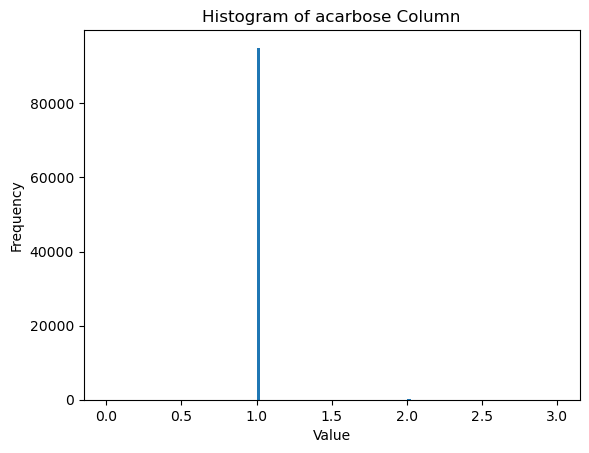

1    95002
2      279
Name: acarbose, dtype: int64


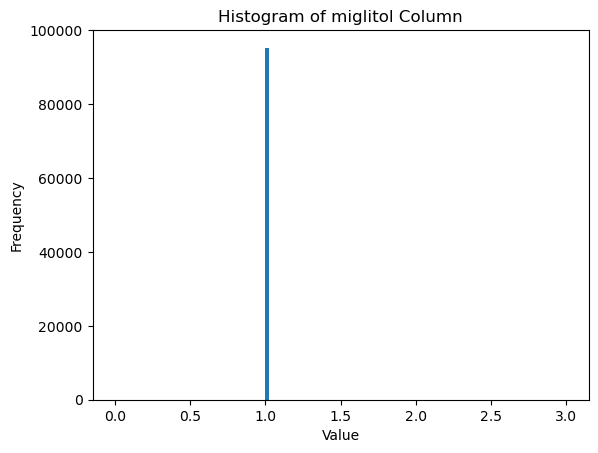

1    95244
2       30
Name: miglitol, dtype: int64


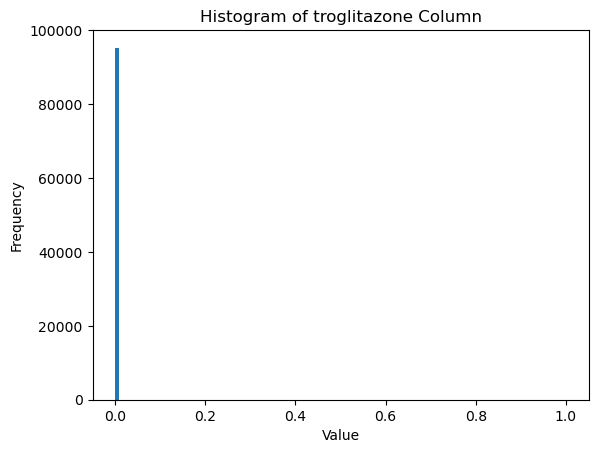

0    95272
Name: troglitazone, dtype: int64


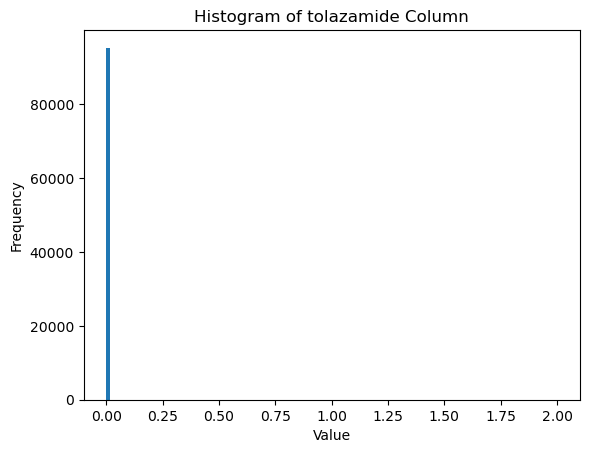

0    95233
1       38
Name: tolazamide, dtype: int64


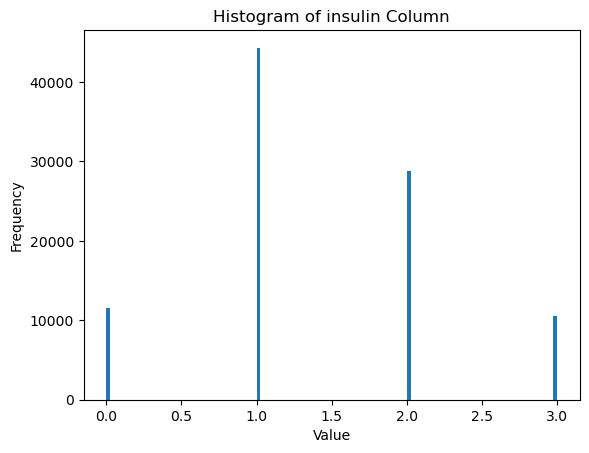

1    44327
2    28829
0    11514
3    10601
Name: insulin, dtype: int64


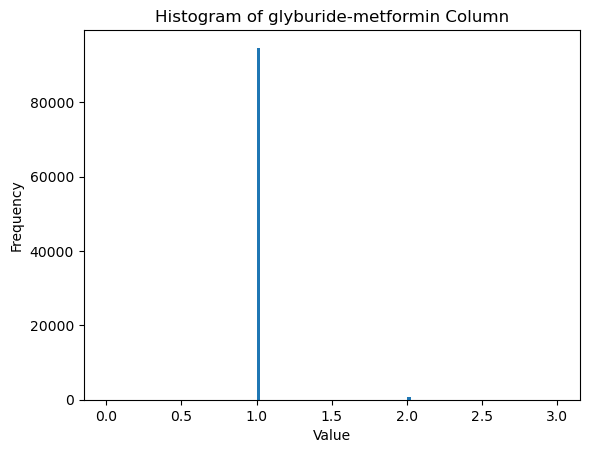

1    94619
2      639
Name: glyburide-metformin, dtype: int64


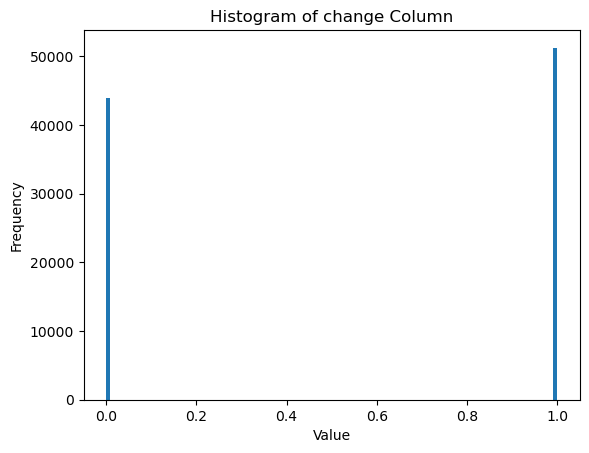

1    51258
0    44000
Name: change, dtype: int64


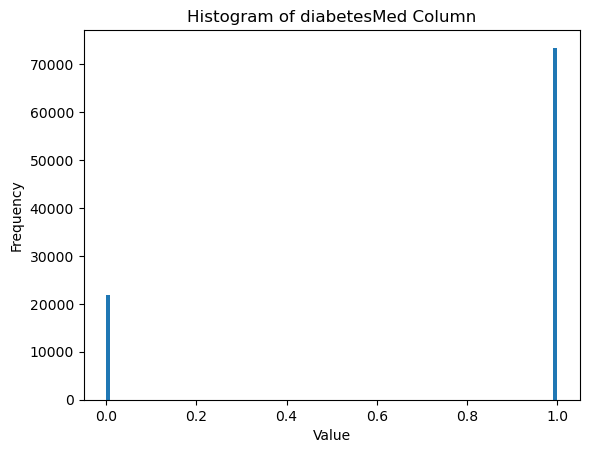

1    73425
0    21833
Name: diabetesMed, dtype: int64


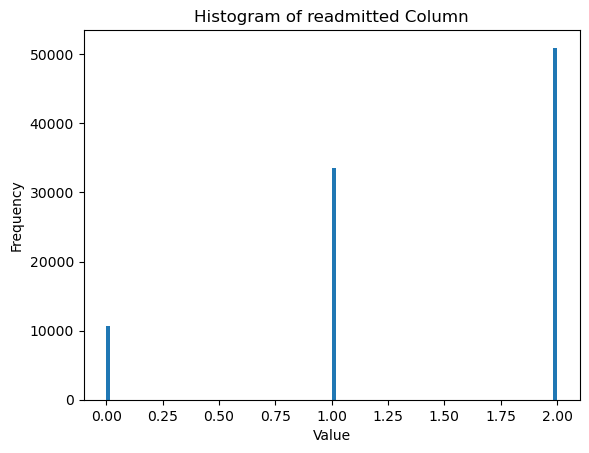

2    50944
1    33590
0    10724
Name: readmitted, dtype: int64


In [24]:
category_counts = {}
categorical_columns = list(categorical_columns)
categorical_columns.remove("glipizide-metformin")
categorical_columns.remove("glimepiride-pioglitazone")
categorical_columns.remove('metformin-rosiglitazone')
categorical_columns.remove('metformin-pioglitazone')
for col in categorical_columns:
    category_counts = df[col].value_counts()
    num_bins = freedman_diaconis_bins(df[column])
    plt.hist(df[col], bins=num_bins)  
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} Column')
    plt.show()

    threshold = 20

    rare_categories = category_counts[category_counts < threshold].index
    df = df[~ df[col].isin(rare_categories)]


    print(df[col].value_counts())


In [25]:
df.drop(columns = ["acetohexamide" , "troglitazone" ] , inplace = True)

In [26]:
all_columns = df.columns
numerical_cols = [col for col in all_columns if col not in categorical_columns]

C:\Users\a\AppData\Local\Temp\ipykernel_15424\2590747600.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]


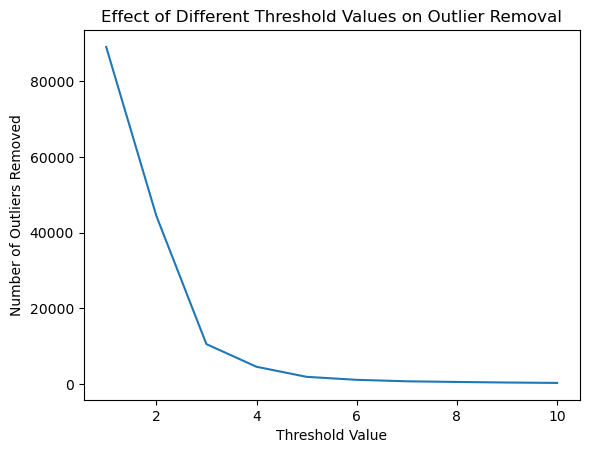

In [27]:
def drop_numerical_outliers(df, cols, z_thresh=3):
    df_out = df.copy()
    for col in cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df_out[z_scores > z_thresh]
        df_out = df_out.drop(outliers.index)
    return df_out

threshold_values = range(1, 11)  
outliers_removed = []
for threshold in threshold_values:
    df_cleaned = drop_numerical_outliers(df, numerical_cols, threshold)
    num_outliers_removed = len(df) - len(df_cleaned)
    outliers_removed.append(num_outliers_removed)

# Plot the number of outliers removed for each threshold value
plt.plot(threshold_values, outliers_removed)
plt.xlabel('Threshold Value')
plt.ylabel('Number of Outliers Removed')
plt.title('Effect of Different Threshold Values on Outlier Removal')
plt.show()

In [28]:
df = drop_numerical_outliers(df, numerical_cols, 3)

C:\Users\a\AppData\Local\Temp\ipykernel_15424\2590747600.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_out[z_scores > z_thresh]


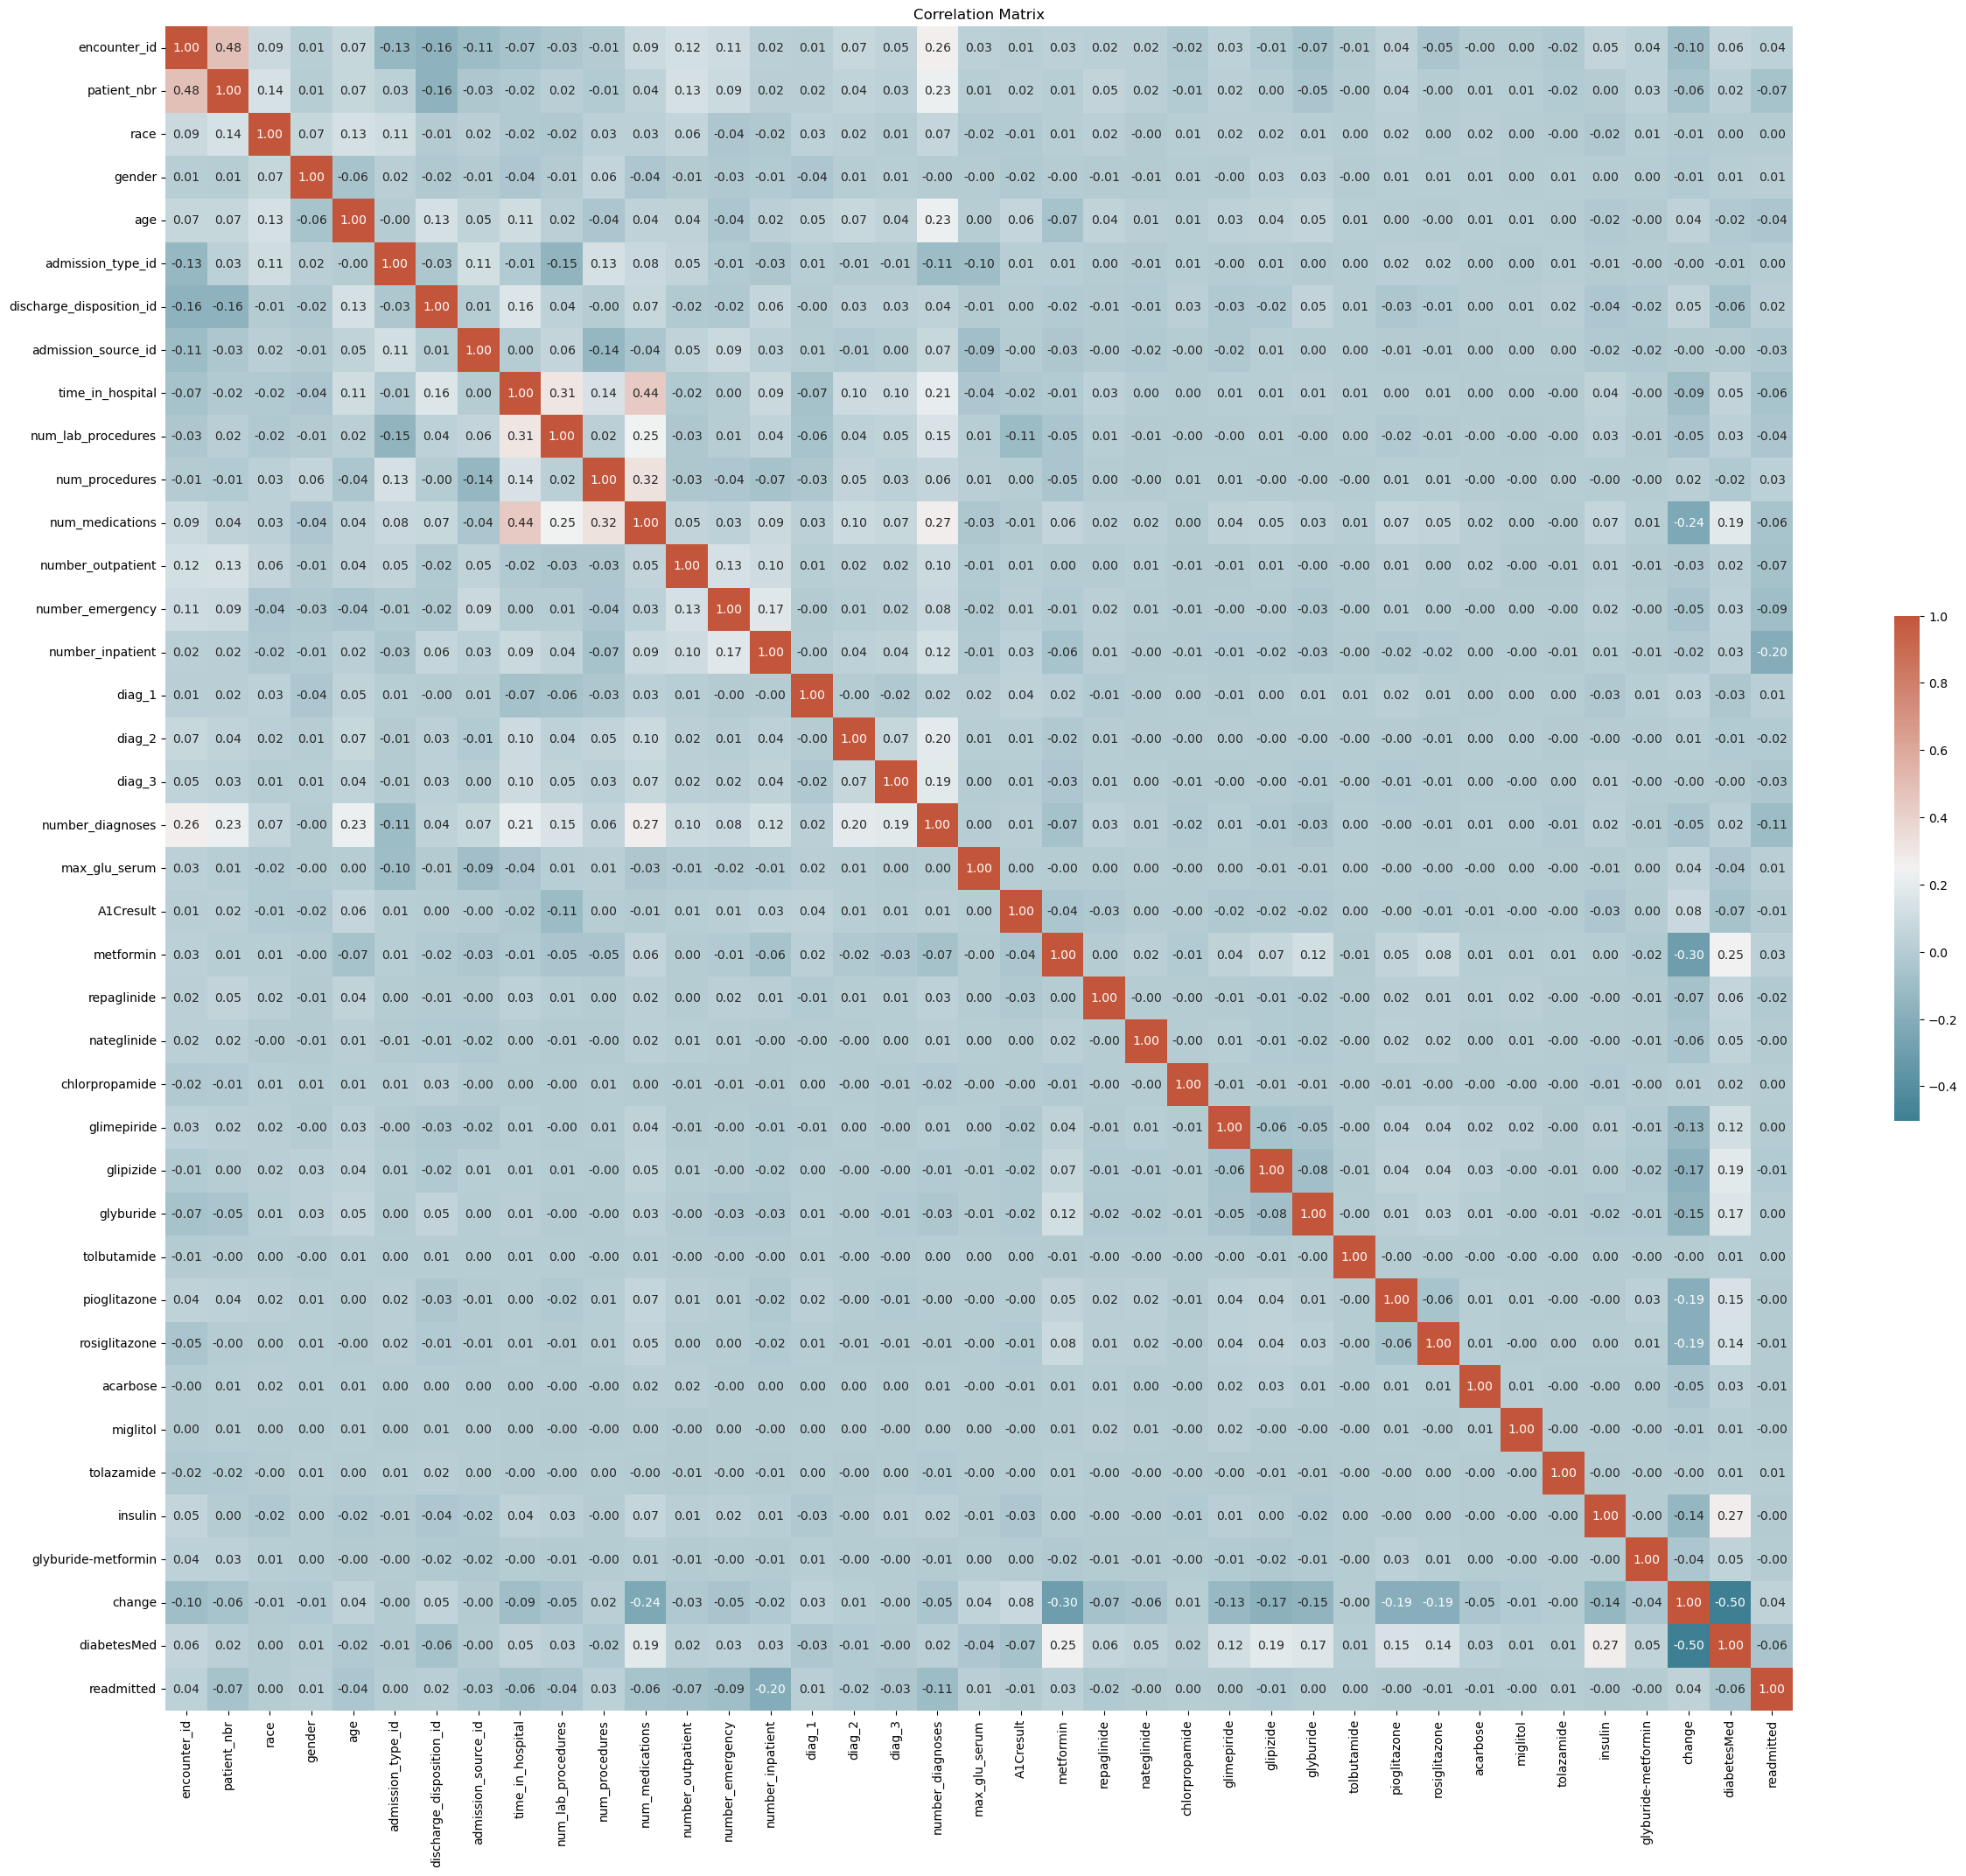

In [29]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 25))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", cbar_kws={"shrink": 0.3})
plt.title('Correlation Matrix')

plt.show()

In [30]:
dff = df.drop(columns = ["encounter_id"])

In [31]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(dff)
columns = [f"PC{i+1}" for i in range(reduced_data.shape[1])]
df_reduced = pd.DataFrame(data=reduced_data, columns=columns)
df_reduced

,PC1,PC2
0,2.455152e+06,-166.450598
1,3.287384e+07,127.221910
2,2.926834e+07,227.182220
3,-1.065477e+07,-248.598108
4,2.946341e+07,-49.731986
...,...,...
84730,-2.798409e+06,-128.117954
84731,4.698844e+07,-230.621984
84732,2.152019e+07,22.938224
84733,-1.208525e+07,-87.299895


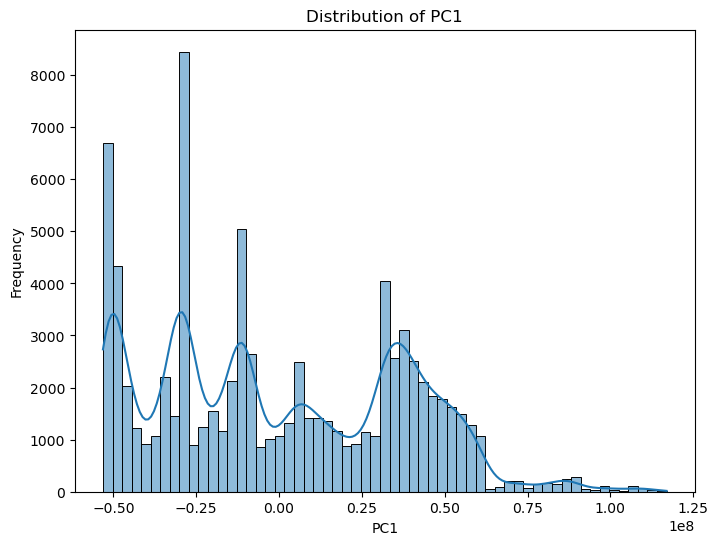

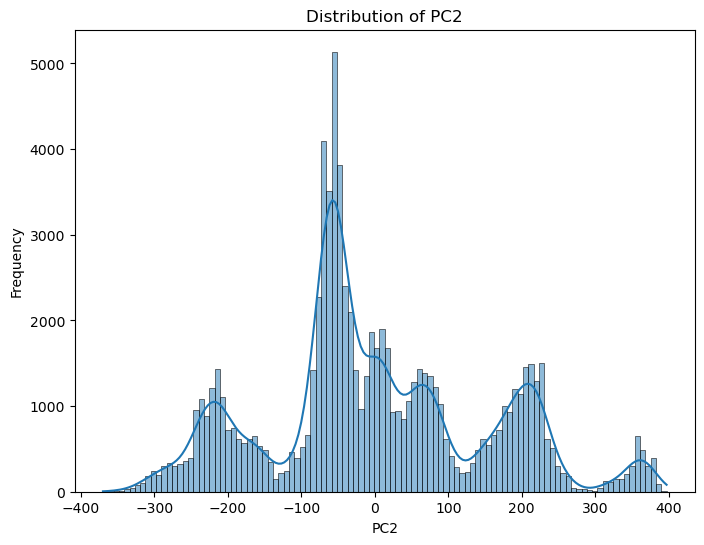

In [32]:
import seaborn as sns

for column in df_reduced.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_reduced[column], kde=True)  # Use histplot for histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns)  


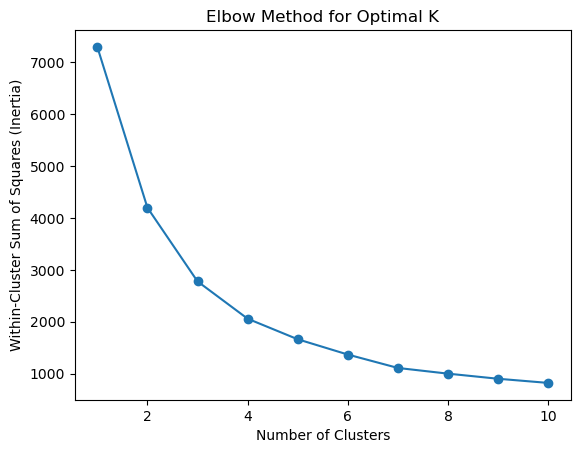

In [34]:
from sklearn.cluster import KMeans


inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()



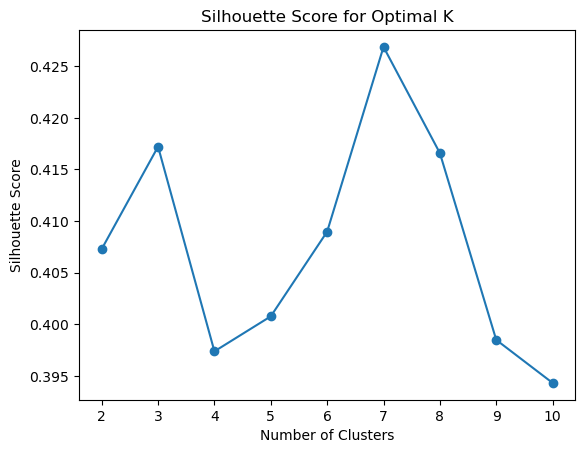

In [35]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [36]:
k = 7
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(df_scaled)
reduced_cluster_assignments = kmeans_model.labels_

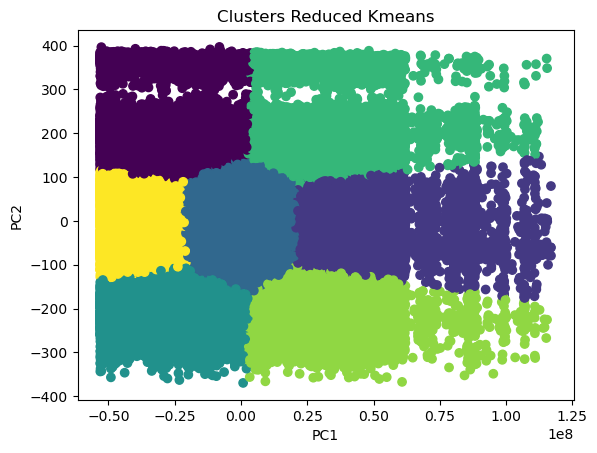

In [37]:
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=reduced_cluster_assignments)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters Reduced Kmeans')
plt.show()

In [38]:
silhouette_score(df_scaled, reduced_cluster_assignments)

0.4268714046506479

In [39]:
df_scaled.to_csv("df_scaled.csv")

In [44]:
ids = df["encounter_id"]

new_df = pd.DataFrame({'Selected_Column': ids,
                       'KMeans_Labels': reduced_cluster_assignments})

new_df.to_excel("result_kmeans.xlsx")

<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto;height : 50px; margin: 1px; padding: 0.5px;"> <h1>  Questions: </h1>
    </div>
    
</html>

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q1: What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.</h1>
    </div>

</html>


     1. we removed columns that had so many missing values.
     2. we removed rows that had errors or had outliers.
     3. we handled outliers by removing or replacing them.
     4. we encoded categorical columns.
 

 Preprocessing a dataset is a crucial step in data analysis and machine learning, as it ensures the data is clean, consistent, and ready for modeling. Here's a detailed explanation of the common preprocessing steps that might be performed on a dataset:

### 1. Data Cleaning
a. Handling Missing Values:
- Removal: Rows or columns with a significant proportion of missing values can be removed.
- Imputation: Missing values can be filled using various strategies, such as mean, median, mode, or more sophisticated methods like k-nearest neighbors (KNN) or regression-based imputation.

b. Handling Outliers:
- Detection: Identify outliers using statistical methods (e.g., Z-score, IQR) or visualization techniques (e.g., box plots).
- Treatment: Outliers can be removed or transformed, depending on the context. For example, they can be capped at a certain value or replaced with the mean/median.

c. Noise Removal:
- Techniques like smoothing, aggregation, or using filters (e.g., moving average) can help reduce noise in the data.

### 2. Data Transformation
a. Scaling and Normalization:
- Standardization: Transform data to have a mean of zero and a standard deviation of one.
- Normalization: Scale data to a range between 0 and 1 or -1 and 1, using min-max scaling or other normalization techniques.

b. Encoding Categorical Variables:
- Label Encoding: Convert categorical labels into integer codes.
- One-Hot Encoding: Create binary columns for each category.
- Binary Encoding: Convert categories to binary digits.
- Target Encoding: Encode categories based on the mean of the target variable.

c. Log Transformation:
- Applied to skewed data to reduce skewness and make the distribution more normal-like.

d. Polynomial Features:
- Create interaction terms or polynomial terms to capture non-linear relationships.

### 3. Feature Engineering
a. Feature Creation:
- Generate new features based on existing data, such as aggregating features over time periods, creating ratios, or using domain knowledge to craft meaningful features.

b. Feature Selection:
- Filter Methods: Select features based on statistical tests (e.g., chi-square, ANOVA).
- Wrapper Methods: Use algorithms like recursive feature elimination (RFE) to select features.
- Embedded Methods: Utilize regularization techniques (e.g., Lasso, Ridge) to select features during model training.

### 4. Data Integration
- Merging Datasets: Combine multiple data sources using keys or indexes to create a single comprehensive dataset.
- Handling Duplicates: Identify and remove duplicate records to ensure data integrity.

### 5. Data Reduction
a. Dimensionality Reduction:
- Techniques like Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or t-SNE can reduce the number of features while preserving variance.

b. Sampling:
- Downsampling: Reduce the number of samples in a large dataset.
- Upsampling: Increase the number of samples in a small dataset, often used in imbalanced classification problems.

### 6. Data Splitting
- Split the dataset into training, validation, and test sets to ensure the model is evaluated on unseen data.

### Example Workflow
Here’s an example workflow combining these steps:

1. Data Cleaning:
   - Remove rows with more than 50% missing values.
   - Impute missing values with the median.
   - Detect and remove outliers using the IQR method.

2. Data Transformation:
   - Standardize numerical features.
   - One-hot encode categorical variables.

3. Feature Engineering:
   - Create new features based on domain knowledge.
   - Select top features using a combination of filter and wrapper methods.

4. Data Integration:
   - Merge data from multiple sources on a common key.
   - Remove duplicate records.

5. Data Reduction:
   - Apply PCA to reduce dimensionality.

6. Data Splitting:
   - Split the data into 70% training, 15% validation, and 15% test sets.

By following these preprocessing steps, the dataset becomes clean, consistent, and ready for effective modeling and analysis.

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q2: What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?
</h1>
    </div>

</html>

We removed the patient ID variable because it was meaningless, but the rest of the items could be meaningful, so it was kept

Also, the columns that were the same for everyone and were categorical were also removed

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q3: Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.
 </h1>
    </div>

</html>


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q4: How can we determine the optimal number of clusters in K-Means</h1>
    </div>

</html>

Determining the optimal number of clusters in K-Means clustering is crucial for achieving meaningful results. Here are several methods commonly used to find the optimal number of clusters:

### 1. Elbow Method
The Elbow Method involves plotting the sum of squared distances from each point to its assigned cluster center (within-cluster sum of squares, or WCSS) against the number of clusters (k). The idea is to identify an "elbow point" where the rate of decrease sharply slows. This point suggests that adding more clusters beyond this does not significantly improve the model.

Steps:
- Run K-Means with a range of k values (e.g., from 1 to 10).
- Calculate the WCSS for each k.
- Plot the WCSS against the number of clusters.
- Look for the elbow point in the plot where the WCSS starts to flatten.

### 2. Silhouette Analysis
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Steps:
- Run K-Means for a range of k values.
- Calculate the average silhouette score for each k.
- Plot the silhouette scores against the number of clusters.
- Choose the k with the highest average silhouette score.

### 3. Gap Statistic
The Gap Statistic compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data. The optimal number of clusters is where this gap is the largest.

Steps:
- Run K-Means for a range of k values.
- Calculate the WCSS for each k.
- Generate B reference datasets and calculate their WCSS.
- Compute the gap statistic.
- Choose the k with the maximum gap statistic.

### 4. Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

Steps:
- Run K-Means for a range of k values.
- Calculate the Davies-Bouldin Index for each k.
- Plot the index against the number of clusters.
- Choose the k with the lowest Davies-Bouldin Index.

### 5. Bayesian Information Criterion (BIC) / Akaike Information Criterion (AIC)
BIC and AIC can be used in the context of Gaussian Mixture Models (GMM), which is a probabilistic model related to K-Means. These criteria balance model fit and complexity.

Steps:
- Fit a GMM for a range of k values.
- Calculate the BIC and AIC for each k.
- Plot BIC and AIC against the number of clusters.
- Choose the k with the lowest BIC or AIC.

### Practical Considerations
- Domain Knowledge: Incorporate any domain-specific knowledge about the data to guide the selection of k.
- Visual Inspection: Use visual methods like plotting clusters to see if the clusters make sense.
- Stability: Check the stability of the clustering by running the algorithm multiple times and ensuring consistent results.

Using a combination of these methods can provide a more robust determination of the optimal number of clusters.


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q5: How can we determine the optimal epsilon value and minPts in DBSCAN?
</h1>
    </div>

</html>
Determining the optimal parameters \( \epsilon \) (epsilon) and \( \text{minPts} \) (minimum points) in DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is crucial for achieving effective clustering. Here are several methods to find these parameters:

### 1. Determining \( \epsilon \)
The parameter \( \epsilon \) defines the maximum distance between two points to be considered neighbors. One common approach to find an appropriate value for \( \epsilon \) is to use the k-distance graph.

Steps:
1. Calculate k-distances: Compute the distance from each point to its \( k \)-th nearest neighbor. A common choice for \( k \) is the same value as \(\text{minPts}\).
2. Plot the k-distances: Sort these distances in ascending order and plot them.
3. Find the "knee" point: Look for the "knee" or "elbow" point in the plot, where the k-distance starts to increase rapidly. This point is a good candidate for \( \epsilon \).

### 2. Determining \(\text{minPts}\)
The parameter \(\text{minPts}\) defines the minimum number of points required to form a dense region.

Guidelines for \(\text{minPts}\):
- Rule of thumb: A common heuristic is \(\text{minPts} = 2 \times \text{dim}\), where \(\text{dim}\) is the number of dimensions in the dataset. For example, in a 2-dimensional dataset, \(\text{minPts} = 4\).
- Data characteristics: If the dataset has noise or is more spread out, a higher \(\text{minPts}\) might be required.
- Domain knowledge: Consider the domain knowledge to select \(\text{minPts}\). For example, in social networks, clusters might represent groups of at least 5 people, so \(\text{minPts} = 5\).

### 3. Iterative Approach
Often, it is beneficial to use an iterative approach to refine both \(\epsilon\) and \(\text{minPts}\):

Steps:
1. Initial estimation:
   - Use the k-distance plot to estimate \(\epsilon\).
   - Choose an initial \(\text{minPts}\) based on the rule of thumb or domain knowledge.
2. Run DBSCAN:
   - Perform DBSCAN with the chosen \(\epsilon\) and \(\text{minPts}\).
3. Evaluate results:
   - Examine the resulting clusters. Check for the presence of too many noise points or overly large/small clusters.
   - Adjust \(\epsilon\) and \(\text{minPts}\) based on the clustering outcome and repeat the process.

### 4. Silhouette Analysis for DBSCAN
Silhouette analysis can be adapted for DBSCAN to evaluate different parameter choices:

Steps:
1. Run DBSCAN with different combinations of \(\epsilon\) and \(\text{minPts}\).
2. Calculate silhouette scores: Compute the silhouette score for each clustering result. The silhouette score measures how similar each point is to its own cluster compared to other clusters.
3. Choose optimal parameters: Select the combination of \(\epsilon\) and \(\text{minPts}\) that maximizes the average silhouette score.

### 5. Grid Search
Conduct a grid search over a range of \(\epsilon\) and \(\text{minPts}\) values to find the optimal combination:

Steps:
1. Define ranges for \(\epsilon\) and \(\text{minPts}\).
2. Run DBSCAN for each combination of parameters within these ranges.
3. Evaluate clustering results: Use evaluation metrics such as the number of clusters, the percentage of noise points, and domain-specific validation methods.
4. Select the best parameters: Choose the parameters that yield the best performance according to the chosen metrics.

### Practical Considerations
- Noise: High noise levels in the dataset might require higher \(\text{minPts}\) or different \(\epsilon\) values.
- Data scale: Standardize or normalize the data if features have different scales to ensure that \(\epsilon\) is meaningful.
- Domain knowledge: Incorporate domain knowledge to guide parameter selection.

By combining these methods, you can systematically determine the optimal \(\epsilon\) and \(\text{minPts}\) values for DBSCAN, leading to more meaningful clustering results.


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q6: When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

</h1>
    </div>

</html>


Choosing between K-Means and DBSCAN depends on the characteristics of your dataset and the specific requirements of your clustering task. Here are some guidelines to help decide which algorithm to use:

### When to Use K-Means

1. Well-Defined, Spherical Clusters:
   - K-Means is best suited for datasets where the clusters are spherical or convex in shape. It works well when clusters are relatively equally sized and have similar densities.

2. Large, Homogeneous Data:
   - K-Means can handle large datasets efficiently, especially when clusters are roughly similar in size and density.

3. Low-Dimensional Data:
   - K-Means performs well on low-dimensional data where the concept of distance (e.g., Euclidean distance) is meaningful.

4. Speed and Scalability:
   - K-Means is computationally efficient and scales well to large datasets. It has a linear time complexity with respect to the number of data points.

5. Known Number of Clusters (k):
   - K-Means requires the number of clusters (k) to be specified in advance. Use K-Means when you have a good estimate of the number of clusters.

6. Smooth Cluster Boundaries:
   - If clusters have smooth and clear boundaries, K-Means is likely to perform well.

### When to Use DBSCAN

1. Arbitrary Shaped Clusters:
   - DBSCAN excels at identifying clusters of arbitrary shapes, including elongated or irregularly shaped clusters. It does not assume spherical clusters.

2. Handling Noise and Outliers:
   - DBSCAN can effectively identify and handle noise points, labeling them as outliers. This is useful for datasets with a significant amount of noise.

3. Varying Density Clusters:
   - DBSCAN can find clusters of varying densities, making it suitable for datasets where clusters have different densities.

4. No Need for Predefined Number of Clusters:
   - DBSCAN does not require specifying the number of clusters in advance. It discovers the number of clusters based on the density of points.

5. High-Dimensional Data:
   - DBSCAN can be effective for high-dimensional data, though the choice of distance metric and parameter tuning becomes more challenging.
   
6. Non-Linearly Separable Data:
   - When clusters are not linearly separable, DBSCAN can be a better choice as it can find clusters based on density rather than distance alone.

### Practical Scenarios

#### Use K-Means If:
- You have a large dataset with roughly spherical, equally sized clusters.
- You know the approximate number of clusters in advance.
- Your data is low-dimensional, and computational efficiency is a priority.
- You are looking for a simple, fast algorithm to partition your data into clusters.

#### Use DBSCAN If:
- Your clusters have arbitrary shapes and are not well-separated.
- Your data contains noise and outliers, and you want the algorithm to identify and exclude them.
- You do not know the number of clusters in advance.
- Your data has varying densities across clusters.
- You are dealing with spatial data or data that naturally forms density-based clusters.

### Examples

- K-Means:
  - Customer segmentation based on purchasing behavior where clusters are expected to be spherical.
  - Grouping similar images based on pixel values in image processing tasks where the number of groups is predefined.

- DBSCAN:
  - Identifying geographic regions of different population densities from spatial data.
  - Clustering gene expression data where clusters have irregular shapes and there is noise in the data.

By considering these guidelines and the specific characteristics of your dataset, you can choose the clustering algorithm that is best suited for your needs.